**Table of contents**<a id='toc0_'></a>    
- [Projekat 1 - nadgledano učenje](#toc1_)    
  - [Podaci o datasetu](#toc1_1_)    
  - [Učitavanje celokupnog skupa podataka](#toc1_2_)    
        - [Broj uzoraka:](#toc1_2_1_1_1_)    
    - [Atributi dataseta](#toc1_2_2_)    
    - [Deskriptivna analiza dataseta](#toc1_2_3_)    
        - [*Skewness plot* za Light:](#toc1_2_3_1_1_)    
        - [*Boxplot* za Light:](#toc1_2_3_1_2_)    
        - [*Skewness plot* za CO2:](#toc1_2_3_1_3_)    
        - [*Boxplot* za CO2:](#toc1_2_3_1_4_)    
  - [Preprocesiranje podataka](#toc1_3_)    
      - [Diskusija rezultata](#toc1_3_1_1_)    
    - [Podela atributa _date_ na više atributa](#toc1_3_2_)    
  - [_Decision Tree_ klasifikator](#toc1_4_)    
      - [Vizuelizacija stabla odluke](#toc1_4_1_1_)    
  - [_Random Forest_ klasifikator](#toc1_5_)    
      - [Optimizacija _Random Forest_ modela izborom relevantnih atributa](#toc1_5_1_1_)    
  - [_KNeighbors_ klasifikator](#toc1_6_)    
  - [Naive Bayes](#toc1_7_)    
  - [Podešavanje hiperparametara](#toc1_8_)    
      - [SVC](#toc1_8_1_1_)    
      - [_DecisionTree_](#toc1_8_1_2_)    
      - [_DecisionTree_ + _Pipeline_/PCA](#toc1_8_1_3_)    
      - [_RandomForest_](#toc1_8_1_4_)    
      - [_KNeighbors_](#toc1_8_1_5_)    
      - [Naive Bayes](#toc1_8_1_6_)    
  - [Balansiranje klasa u skupu podataka](#toc1_9_)    
      - [Balansiranje SVC modela](#toc1_9_1_1_)    
      - [Balansiranje _DecisionTree_ modela](#toc1_9_1_2_)    
      - [Balansiranje _RandomForest_ modela](#toc1_9_1_3_)    
    - [Zaključak](#toc1_9_2_)    
  - [Feature selection / reduction](#toc1_10_)    
      - [PCA](#toc1_10_1_1_)    
      - [_VarianceThreshold_](#toc1_10_1_2_)    
      - [_Highly Correlated Matrix Feature Reduction_](#toc1_10_1_3_)    
      - [_SelectPercentile_](#toc1_10_1_4_)    
      - [_Recursive Feature Elimination_](#toc1_10_1_5_)    
  - [Poboljšanje klasifikacije pomoću _Ensemble_ metoda](#toc1_11_)    
    - [_Bagging_](#toc1_11_1_)    
    - [_Boosting_](#toc1_11_2_)    
      - [_AdaBoostClassifier_](#toc1_11_2_1_)    
      - [_HistGradientBoostingClassifier_](#toc1_11_2_2_)    
    - [_Voting_](#toc1_11_3_)    
    - [_Stacking_](#toc1_11_4_)    
- [Diskusija](#toc2_)    
  - [Finalni skup podataka](#toc2_1_)    
  - [_Cross-validation_ modela](#toc2_2_)    
    - [Grafički prikaz rezultata _cross_-validacije za tačnost modela](#toc2_2_1_)    
  - [Evaluacija modela i iscrtavanje grafika](#toc2_3_)    
    - [Matrica zabune](#toc2_3_1_)    
    - [_Receiver Operating Characteristic_](#toc2_3_2_)    
    - [_Precision-Recall_ kriva](#toc2_3_3_)    
    - [_Log-loss_ modela](#toc2_3_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Projekat 1 - nadgledano učenje](#toc0_)

**Dataset:** http://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+

**Definicija problema:** Na osnovu parametara sa senzora za temperaturu, vlažnost vazduha, koncentraciju CO2 i osvetljenja odrediti da li je u prostoriji prisutna neka osoba.

**Vrsta problema:** binarna klasifikacija

## <a id='toc1_1_'></a>[Podaci o datasetu](#toc0_)

Izabrani dataset sadrži *time-series* podatke očitane sa senzora postavljenih u jednoj kancelariji. 

## <a id='toc1_2_'></a>[Učitavanje celokupnog skupa podataka](#toc0_)

Ceo skup podataka sastoji se iz 3 datoteke:
1. _datatest_
2. _datatest2_
3. _datatrain_

Potrebno je učitati sve ove podatke, spojiti ih u jedinstveni skup podataka i zatim izvršiti preprocesiranje i podelu na trening i test podatke.

Broj uzoraka u kompletnom skupu podataka jeste **20560**. Izdvaja se kategorički atribut Occupancy i skup se dalje deli na trening i test skupove u razmeri 80%-20% sa mešanjem podataka. Broj uzoraka u trening skupu iznosi **16448**, a broj uzoraka u test skupu je **4112**.



In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

sns.set(style="darkgrid")

dataTest2 = pd.read_csv("occupancy_data/datatest2.txt", sep=',')
dataTest = pd.read_csv("occupancy_data/datatest.txt", sep=',')
dataTrain = pd.read_csv("occupancy_data/datatraining.txt", sep=',')

data= pd.concat([dataTest,dataTrain,dataTest2],axis=0)

data.head(10)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1
145,2015-02-02 14:23:59,23.7600,26.260,568.666667,790.000000,0.004779,1
146,2015-02-02 14:25:00,23.7300,26.290,536.333333,798.000000,0.004776,1
147,2015-02-02 14:25:59,23.7540,26.290,509.000000,797.000000,0.004783,1
148,2015-02-02 14:26:59,23.7540,26.350,476.000000,803.200000,0.004794,1
149,2015-02-02 14:28:00,23.7360,26.390,510.000000,809.000000,0.004796,1


##### <a id='toc1_2_1_1_1_'></a>[Broj uzoraka:](#toc0_)

In [2]:
len(data)

20560

### <a id='toc1_2_2_'></a>[Atributi dataseta](#toc0_)

1. **_Date_** - Datum i vreme merenja.
2. **_Temperature_** - Temperatura u prostoriji izražena u stepenima Celzijusa. Kontinualne numeričke vrednosti.
3. **_Humidity_** - Vlažnost vazduha izražena u procentima. Kontinualne numeričke vrednosti.
4. **_Light_** - Osvetljenje u prostoriji izraženo u luksima. Kontinualni numerički podatak.
5. **_CO2_** - Koncentracija ugljen-dioksida u prostoriji izražena u ppm (*parts per million*). Kontinualni numerički podatak.
6. **_HumidityRatio_** - Odnos *kgwater-vapor/kg-air* (broj kilograma vodene pare po kilogramu vazduha). Kontinualni numerički podatak.
7. **_Occupancy_** - Binarni podatak koji govori da li u prostoriji ima nekog ili je prazna.

### <a id='toc1_2_3_'></a>[Deskriptivna analiza dataseta](#toc0_)

Sledeći isečak koda prikazuje distribuciju klasa u datasetu:

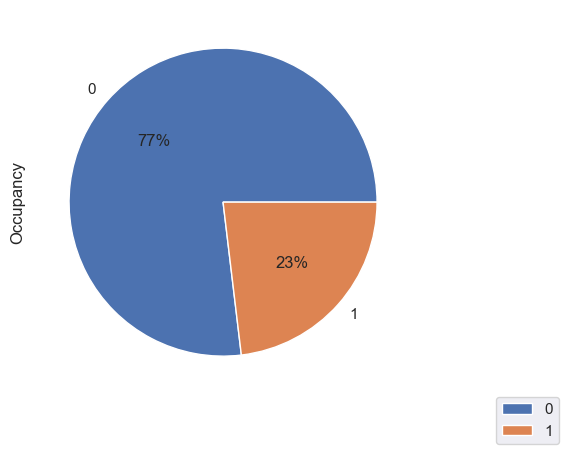

In [3]:
plt.figure(figsize=(7, 5))
pie = data.Occupancy.value_counts().plot(kind='pie', autopct='%1.0f%%')
pie.figure.set_size_inches(7, 5)
pie.figure.legend(loc='lower right')
plt.savefig("graphs/classdistribution.jpg")
plt.show()

Na dijagramu se može videti distribucija klasa u skupu podataka. Plavi deo dijagrama odgovara vrednosti 0 koja kodira stanje prazne prostorije, dok narandžasti deo odgovara vrednosti 1 koja kodira prisutnost osobe u prostoriji. Ovo su dve klase kojima jedan uzorak može da pripada, a cilj projekta biće razvijanje modela koji podatak klasifikuje u jednu od ove dve klase.

In [4]:
data.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000


Vrednosti za Light i CO2 imaju najveći opseg, pa je korisno ispitati njihovu distribuciju.

##### <a id='toc1_2_3_1_1_'></a>[*Skewness plot* za Light:](#toc0_)

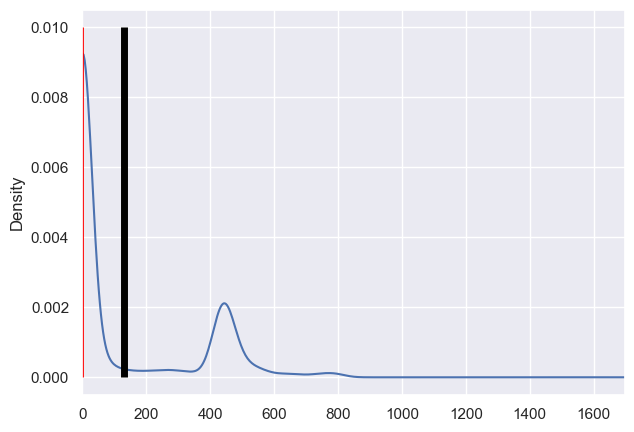

In [5]:
skewplot = data.Light.plot(kind="density",
              figsize=(7,5),
              xlim=(data.Light.min(),data.Light.max()));
plt.vlines(data.Light.mean(), 
           ymin=0, 
           ymax=0.01,
           linewidth=5.0,
           color="black");
plt.vlines(data.Light.median(),
           ymin=0, 
           ymax=0.01, 
           linewidth=2.0,
           color="red");

plt.savefig("graphs/skewplot-light.jpg")
plt.show()

##### <a id='toc1_2_3_1_2_'></a>[*Boxplot* za Light:](#toc0_)

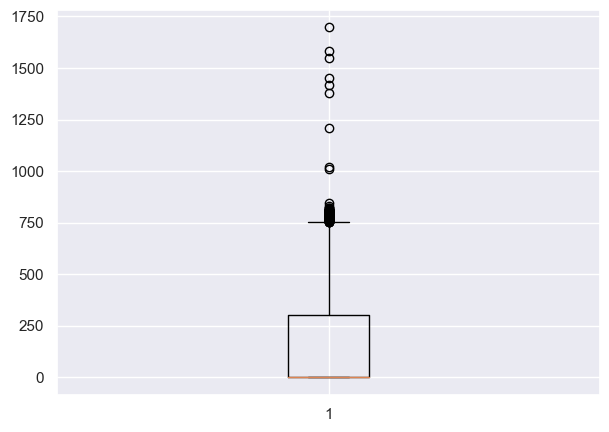

In [6]:
plt.figure(figsize=(7, 5))
boxplot = plt.boxplot(data.Light)
plt.savefig("graphs/boxplot-light.jpg")
plt.show()

##### <a id='toc1_2_3_1_3_'></a>[*Skewness plot* za CO2:](#toc0_)

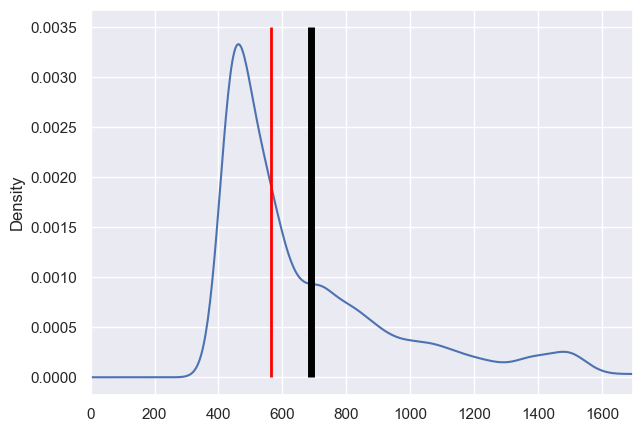

In [7]:
skewplot = data.CO2.plot(kind="density",
              figsize=(7,5),
              xlim=(data.Light.min(),data.Light.max()));
plt.vlines(data.CO2.mean(), 
           ymin=0, 
           ymax=0.0035,
           linewidth=5.0,
           color="black");
plt.vlines(data.CO2.median(),
           ymin=0, 
           ymax=0.0035, 
           linewidth=2.0,
           color="red");

plt.savefig("graphs/skewplot-CO2.jpg")
plt.show()

##### <a id='toc1_2_3_1_4_'></a>[*Boxplot* za CO2:](#toc0_)

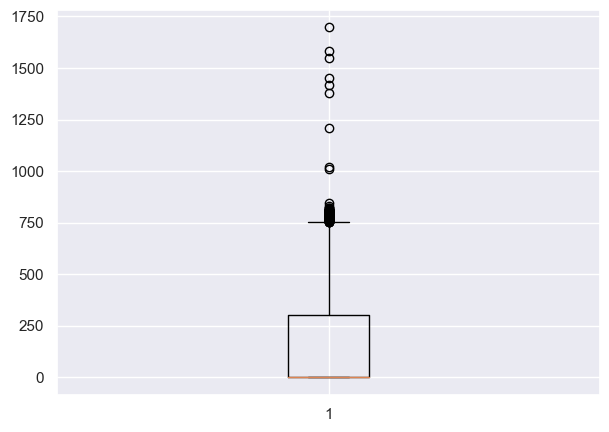

In [8]:
plt.figure(figsize=(7, 5))
boxplot = plt.boxplot(data.Light)
plt.savefig("graphs/boxplot-CO2.jpg")
plt.show()

Na osnovu ova 4 grafika može se primetiti da ovi atributi imaju značajan broj *outlier*-a.

Na dijagramu ispod može se videti korelacija između podataka:

C:\Users\Nikola\AppData\Local\Temp\ipykernel_964\3944433216.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  gender_correlation=data.corr()


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0.5, 0, 'Temperature'),
  Text(1.5, 0, 'Humidity'),
  Text(2.5, 0, 'Light'),
  Text(3.5, 0, 'CO2'),
  Text(4.5, 0, 'HumidityRatio'),
  Text(5.5, 0, 'Occupancy')])

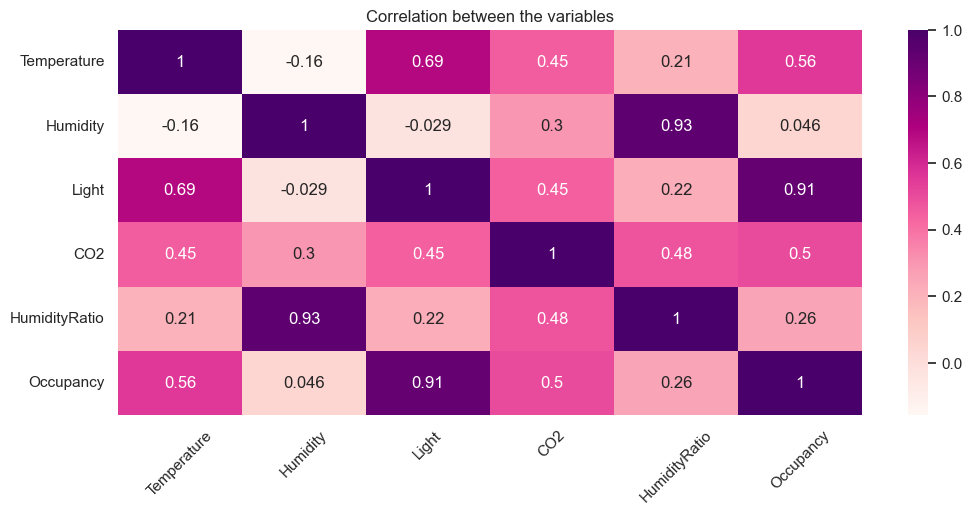

In [9]:
plt.subplots(figsize=(12,5))
gender_correlation=data.corr()
sns.heatmap(gender_correlation,annot=True,cmap='RdPu')
plt.title('Correlation between the variables')
plt.xticks(rotation=45)

## <a id='toc1_3_'></a>[Preprocesiranje podataka](#toc0_)

Na osnovu pregleda dataseta uočava se da su svi atributi osim _Date_ atributa numerički. Kako bi se podaci pripremili za primenu algoritma mašinskog učenja, potrebno je _Date_ podatke, koji su tipa _string_, pretopiti u numerički format.

U te svrhe najpre ćemo isprobati konverziju datuma i vremena u milisekunde:

In [10]:
data['date'] = [pd.to_datetime(date, format='%Y-%m-%d %H:%M:%S') for date in data['date']]
data['date'] = pd.DatetimeIndex(data.date).asi8
data['date'].head(2)

140    1422886740000000000
141    1422886799000000000
Name: date, dtype: int64

Može se uočiti iz sledećeg isečka koda da ne postoje podaci kojima nedostaju vrednosti

In [11]:
data.isnull().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

Sledeći korak predstavlja izdvajanje kategoričke vrednosti od ostalih atributa skupa podataka:

In [12]:
cols = [col for col in data.columns if col not in ['Occupancy']]
data_features = data[cols]
target = data['Occupancy']
data_features.head(2)

,date,Temperature,Humidity,Light,CO2,HumidityRatio
140,1422886740000000000,23.700,26.272,585.2,749.2,0.004764
141,1422886799000000000,23.718,26.290,578.4,760.4,0.004773


Nakon odstranjivanja kategoričke vrednosti, koja zapravo predstavlja ciljni atribut, potrebno je podeliti skup podataka u train i test podatke. Test podaci predstavljaju ukupno 20% originalnog skupa podataka.

In [13]:
from sklearn.model_selection import train_test_split

data_train,data_test,target_train,target_test = train_test_split(data_features,target,test_size=0.2,random_state=10)

print(f"Broj uzoraka u trening skupu podataka: {len(data_train)}")
print(f"Broj uzoraka u test skupu podataka: {len(data_test)}")

Broj uzoraka u trening skupu podataka: 16448
Broj uzoraka u test skupu podataka: 4112


Podaci su pretrpeli minimalne izmene koje su potrebne za primenu bilo kog algoritma mašinskog učenja. Sledeća slika predstavlja najbolju praksu za primenu algoritama mašinskog učenja na osnovu zadatka koji se rešava (preuzeto sa _sklearn_ dokumentacije):

![ml-algorithms-best-practice.png](resource_images/ml-algorithms-best-practice.png)

Preporuka je da se za skupove podataka sa manje od 100 000 uzoraka krene od linearnog SVC, što je primenjeno u sledećem isečku koda:

In [14]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
import io

svc_model = LinearSVC(random_state=0)

pred = svc_model.fit(data_train, target_train).predict(data_test)

print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))
report = classification_report(target_test,pred, digits=5)
with io.open('evaluation/classification_report.txt','w',encoding='utf-8') as f: f.write(report)


LinearSVC accuracy :  0.7621595330739299


c:\Users\Nikola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Nikola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nikola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nikola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification

_Sklearn_ daje warning koji govori da model nije uspeo da konvergira ka rešenju. Ovakav problem nastaje usled loše balansiranih atributa - atributi _Light_ i _CO2_, kao i transformisani _Date_ atribut, su velike vrednosti. U slučaju Light i CO2 atributa, postoji i dosta _outlier_-a. Kako bi se ovaj problem otklonio, može se primeniti _scaler_ na podatke u cilju njihove normalizacije.


U sledećem isečku koda može se videti da model uopšte ne prepoznaje postojanje druge klase podataka (klase kodirane brojem 1 koji označava prisutost osobe u prostoriji):

In [15]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(target_test, pred))

[[3134    0]
 [ 978    0]]


Primenom _MinMaxScaler_-a na postojeće podatke dolazi se do modela koji može da konvergira ka rešenju. Izvršena je evaluacija tačnosti modela, kao i određivanje matrice zabune. Izveštaj o klasifikaciji snimljen je u direktorijumu _evaluation_ u datoteci "classification_report_scaler.txt".

In [16]:
from sklearn import preprocessing
from sklearn.svm import SVC

scaler = preprocessing.MinMaxScaler()

svc_model = SVC(kernel="linear",random_state=0,probability=True)

data_train = scaler.fit_transform(data_train)
data_test = scaler.transform(data_test)

pred = svc_model.fit(data_train, target_train).predict(data_test)

print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))
report = classification_report(target_test,pred, digits=5)
with io.open('evaluation/classification_report_scaler.txt','w',encoding='utf-8') as f: f.write(report)
print(confusion_matrix(target_test, pred))


LinearSVC accuracy :  0.9880836575875487
[[3087   47]
 [   2  976]]


#### <a id='toc1_3_1_1_'></a>[Diskusija rezultata](#toc0_)

Linearni SVC model treniran na skaliranim skupom podataka daje tačnost od 98,81%. 

Iz matrice zabune uočava se sledeće:
- model klasifikuje 3087 uzoraka klase 0 pozitivno, dok za 2 uzorka greši u klasifikaciji prepoznajući ih kao klasu 1. 
- 976 uzoraka klase 1 prepoznato je pravilno, a greška je načinjena za svega 47 uzoraka

Prevedeno u procente, model greši u 0,065% klasifikacija za klasu 0, ali zato za klasu 1 greši u 4.594%. Cilj daljih poboljšanja treba da bude balansiranje greške tako da se procenat ujednači.

Radi lakšeg rada, definisali smo funkciju koja služi za iscrtavanje i snimanje matrice zabune kao tabelarni prikaz sa podacima u procentima:

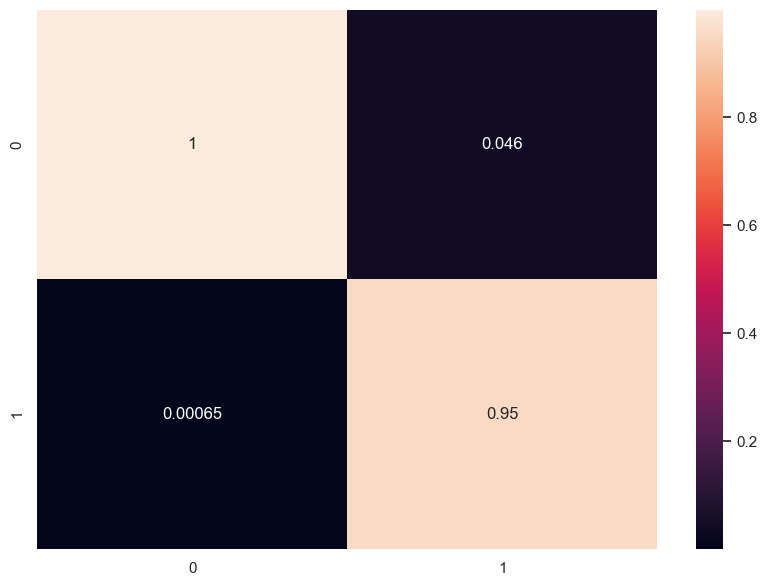

In [17]:
def plot_cfm(target_test, pred, cfm_file_name: str):
    cfm_result = confusion_matrix(target_test, pred, normalize="pred")
    classes = ["0", "1"]
    df_cfm = pd.DataFrame(cfm_result, index = classes, columns = classes)
    plt.figure(figsize = (10,7))
    cfm_plot = sns.heatmap(df_cfm, annot=True)
    cfm_plot.figure.savefig(f"evaluation\{cfm_file_name}.png")

plot_cfm(target_test, pred, "cfm_initial")

Iz matrice zabune može se videti da model pogrešno klasifikuje klasu 0 kao klasu 1 u 0,065% slučajeva, što je manje u odnosu na model dobijen treniranjem nad manjim skupom podataka. Sa druge strane, model pogrešno klasifikuje klasu 1 kao klasu 0 u 4,6% slučajeva, što je ponovo bolje u odnosu na prethodni model.

Iako je tačnost modela relativno slična, ovaj model pravi manje grešaka u klasifikacijama pojedinačnih klasa. Međutim, i dalje treba raditi na balansiranju greške u klasifikaciji obe klase.

> _Napomena: u tabelarnom prikazu matrice zabune stoji da model klasifikuje klasu 0 pozitivno u 100% slučajeva, a da je klasifikuje pogrešno u 0,065% slučajeva. Ovakav ispis nastaje usled seaborn-ovog zaokruživanja brojeva na veću decimalu, dok je realna situacija da model klasifikuje klasu 0 kao pozitivnu u 99.935% slučajeva._

### <a id='toc1_3_2_'></a>[Podela atributa _date_ na više atributa](#toc0_)

Do sada smo radili sa atributom _date_ u obliku _timestamp_-a u nanosekundama. U cilju poboljšanja rada algoritma, ovaj atribut ćemo podeliti na dva atributa - koji je dan u nedelji i koliko je sekundi prošlo od početka tog dana (odnosno, od ponoći). Ovakva podela može biti relevantna usled prirode skupa podataka. Podaci su skupljani u intervalima od jednog minuta u okviru kancelarijske prostorije, tako da uticaj dana u nedelji i tačnog doba dana može doprineti poboljšanju klasifikacije.

Novi atributi su sledećeg formata:

- _dayOfWeek_: ordinal, numerički zapis dana u nedelji, gde 0 predstavlja ponedeljak a 6 predstavlja nedelju
- _secondsSinceMidnight_: numerički kontinualan podatak koji iskazuje sekunde od ponoći datog dana

Sledeći isečak koda deli atribut _date_ na atribute _dayOfWeek_ i _secondsSinceMidnight_:

In [18]:
data['date'] = pd.to_datetime(data['date'], unit='ns')
data['dayOfWeek'] = data['date'].dt.day_of_week
data['secondsSinceMidnight'] = data['date'].apply(lambda x: (x.hour * 3600 + x.minute * 60 + x.second))
p = data.describe()
print(p)
data.head(2)


        Temperature      Humidity         Light           CO2  HumidityRatio  \
count  20560.000000  20560.000000  20560.000000  20560.000000   20560.000000   
mean      20.906212     27.655925    130.756622    690.553276       0.004228   
std        1.055315      4.982154    210.430875    311.201281       0.000768   
min       19.000000     16.745000      0.000000    412.750000       0.002674   
25%       20.200000     24.500000      0.000000    460.000000       0.003719   
50%       20.700000     27.290000      0.000000    565.416667       0.004292   
75%       21.525000     31.290000    301.000000    804.666667       0.004832   
max       24.408333     39.500000   1697.250000   2076.500000       0.006476   

          Occupancy     dayOfWeek  secondsSinceMidnight  
count  20560.000000  20560.000000          20560.000000  
mean       0.231031      2.896109          42997.431031  
std        0.421503      2.059338          25497.938212  
min        0.000000      0.000000              

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,dayOfWeek,secondsSinceMidnight
140,2015-02-02 14:19:00,23.700,26.272,585.2,749.2,0.004764,1,0,51540
141,2015-02-02 14:19:59,23.718,26.290,578.4,760.4,0.004773,1,0,51599


Sada je potrebno izbaciti atribut _date_ i izdvojiti kategorički atribut _Occupancy_:

In [19]:
cols = [col for col in data.columns if col not in ['Occupancy','date']]
data_features = data[cols]
target = data['Occupancy']
data_features.head(2)

,Temperature,Humidity,Light,CO2,HumidityRatio,dayOfWeek,secondsSinceMidnight
140,23.700,26.272,585.2,749.2,0.004764,0,51540
141,23.718,26.290,578.4,760.4,0.004773,0,51599


Dalje, koristimo transformisane podatke da istreniramo model:

In [20]:
data_train,data_test,target_train,target_test = train_test_split(data_features,target,test_size=0.2,random_state=10)

print(len(data_train))
print(len(data_test))

scaler = preprocessing.MinMaxScaler()

data_train = scaler.fit_transform(data_train)
data_test = scaler.transform(data_test)

pred = svc_model.fit(data_train, target_train).predict(data_test)

print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))
print(confusion_matrix(target_test, pred))



16448
4112
LinearSVC accuracy :  0.9892996108949417
[[3092   42]
 [   2  976]]


Performanse modela sa podelom atributa _date_ su neznatno bolje u odnosu na performanse modela koji koristi integralni _date_ atribut (98.81% u poređenju sa 98.93%). 

Sledeći isečak koda primenjuje _StandardScaler_ na podatke u cilju daljeg poboljšanja performansi:

In [21]:
data_train,data_test,target_train,target_test = train_test_split(data_features,target,test_size=0.2,random_state=10)

scaler = preprocessing.StandardScaler()

data_train = scaler.fit_transform(data_train)
data_test = scaler.transform(data_test)

pred = svc_model.fit(data_train, target_train).predict(data_test)

print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))
print(confusion_matrix(target_test, pred))

LinearSVC accuracy :  0.9897859922178989
[[3094   40]
 [   2  976]]


Sledeći isečak koda primenjuje _RobustScaler_ na podatke u cilju daljeg poboljšanja performansi:

In [22]:
data_train,data_test,target_train,target_test = train_test_split(data_features,target,test_size=0.2,random_state=10)

scaler = preprocessing.RobustScaler()

data_train = scaler.fit_transform(data_train)
data_test = scaler.transform(data_test)

pred = svc_model.fit(data_train, target_train).predict(data_test)

print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))
print(confusion_matrix(target_test, pred))

LinearSVC accuracy :  0.9895428015564203
[[3093   41]
 [   2  976]]


Može se primetiti da od prethodno iskorišćenih _scaler-a StandardScaler_ pokazuje najbolje performanse.

In [23]:
data_train,data_test,target_train,target_test = train_test_split(data_features,target,test_size=0.2,random_state=10)

scaler = preprocessing.StandardScaler()

data_train = scaler.fit_transform(data_train)
data_test = scaler.transform(data_test)

pred = svc_model.fit(data_train, target_train).predict(data_test)

print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))
print(confusion_matrix(target_test, pred))
report = classification_report(target_test, pred, digits=5)
with io.open('evaluation/classification_report_LinearSVC.txt', 'w', encoding='utf-8') as f: f.write(report)

LinearSVC accuracy :  0.9897859922178989
[[3094   40]
 [   2  976]]


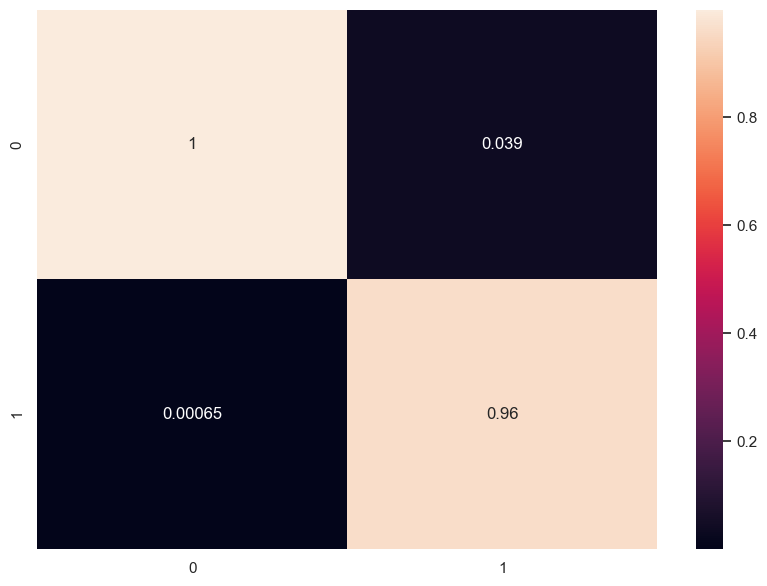

In [24]:
plot_cfm(target_test, pred, "cfm2")

Proverićemo ROC (_Receiver Operating Statistic_) modela:

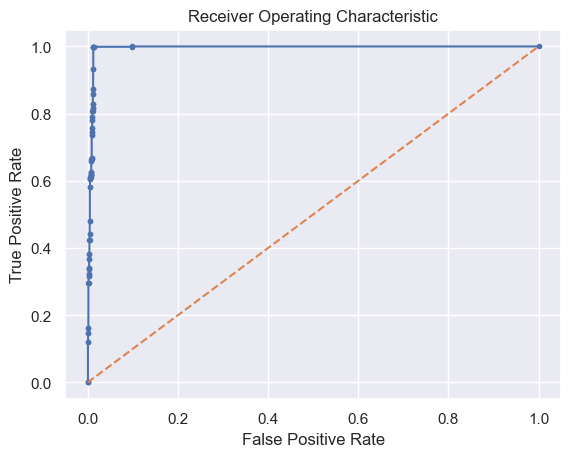

ROC AUC=0.994


In [25]:
from sklearn.metrics import roc_curve, roc_auc_score

target_probabilities = svc_model.predict_proba(data_test)[:,1]

false_positive_rate, true_positive_rate, threshold = roc_curve(target_test,target_probabilities)

plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate, marker='.')
plt.plot([0, 1], ls="--")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

lr_auc = roc_auc_score(target_test, target_probabilities)
print('ROC AUC=%.3f' % (lr_auc))


Po izgledu grafika, može se reći da model vrši skoro savršenu klasifikaciju. Računanjem procentualne površine ispod ROC krive dobija se 99,4%, što je skoro savršen rezultat.

In [26]:
print(svc_model.n_support_)
print(len([x for x in target_train if x == 0]))
print(len([x for x in target_train if x == 1]))

[254 255]
12676
3772


Budući da je iskorišćen _Support Vector_ model, korisno je pogledati koliko vektora iz ulaznog skupa podataka su _support_ vektori za model.

Na osnovu izvršenja prethodnog isečka koda, vidi se da za klasu 0 postoji 254 _support_ vektora od ukupno 12676, dok je za klasu 1 uzeto 255 vektora kao _support_ vektori od ukupno 3772.

## <a id='toc1_4_'></a>[_Decision Tree_ klasifikator](#toc0_)

Do sada smo koristili _Support Vector_ klasifikator, koji na osnovu skupa uzoraka pronalazi ključne i formira hiperravan koja deli dve klase podataka. 

Još jedan algoritam za klasifikaciju jeste _Decision Tree_ klasifikator, koji na osnovu vrednosti atributa deli skup uzoraka na više podskupova iterativno sve dok ne formira stablo čiji su čvorovi podskupovi ulaznog skupa podataka gde svaki član pripada samo jednoj klasi.

U sledećem isečku koda treniramo _Decision Tree_ klasifikator na istom skupu podataka:

In [27]:
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier(random_state=0)

predDT = decisionTree.fit(data_train, target_train).predict(data_test)

print("DecisionTree accuracy : ", accuracy_score(target_test, predDT, normalize = True))
print(confusion_matrix(target_test, predDT))
report = classification_report(target_test, predDT, digits=5)
with io.open('evaluation/classification_report_DecisionTree_1.txt', 'w', encoding='utf-8') as f: f.write(report)

DecisionTree accuracy :  0.992704280155642
[[3118   16]
 [  14  964]]


Istrenirani _Decision Tree_ klasifikator postiže tačnost klasifikacije od 99,27%, što je znatno bolje u odnosu na _Support Vector_ klasifikator (98,98%). Obzirom da su iskorišćeni isti podaci sa istim primenjenim transformacijama, dobro bi bilo istražiti mogućnosti _Decision Tree_ klasifikatora u formi podešavanja njegovih parametara.

#### <a id='toc1_4_1_1_'></a>[Vizuelizacija stabla odluke](#toc0_)

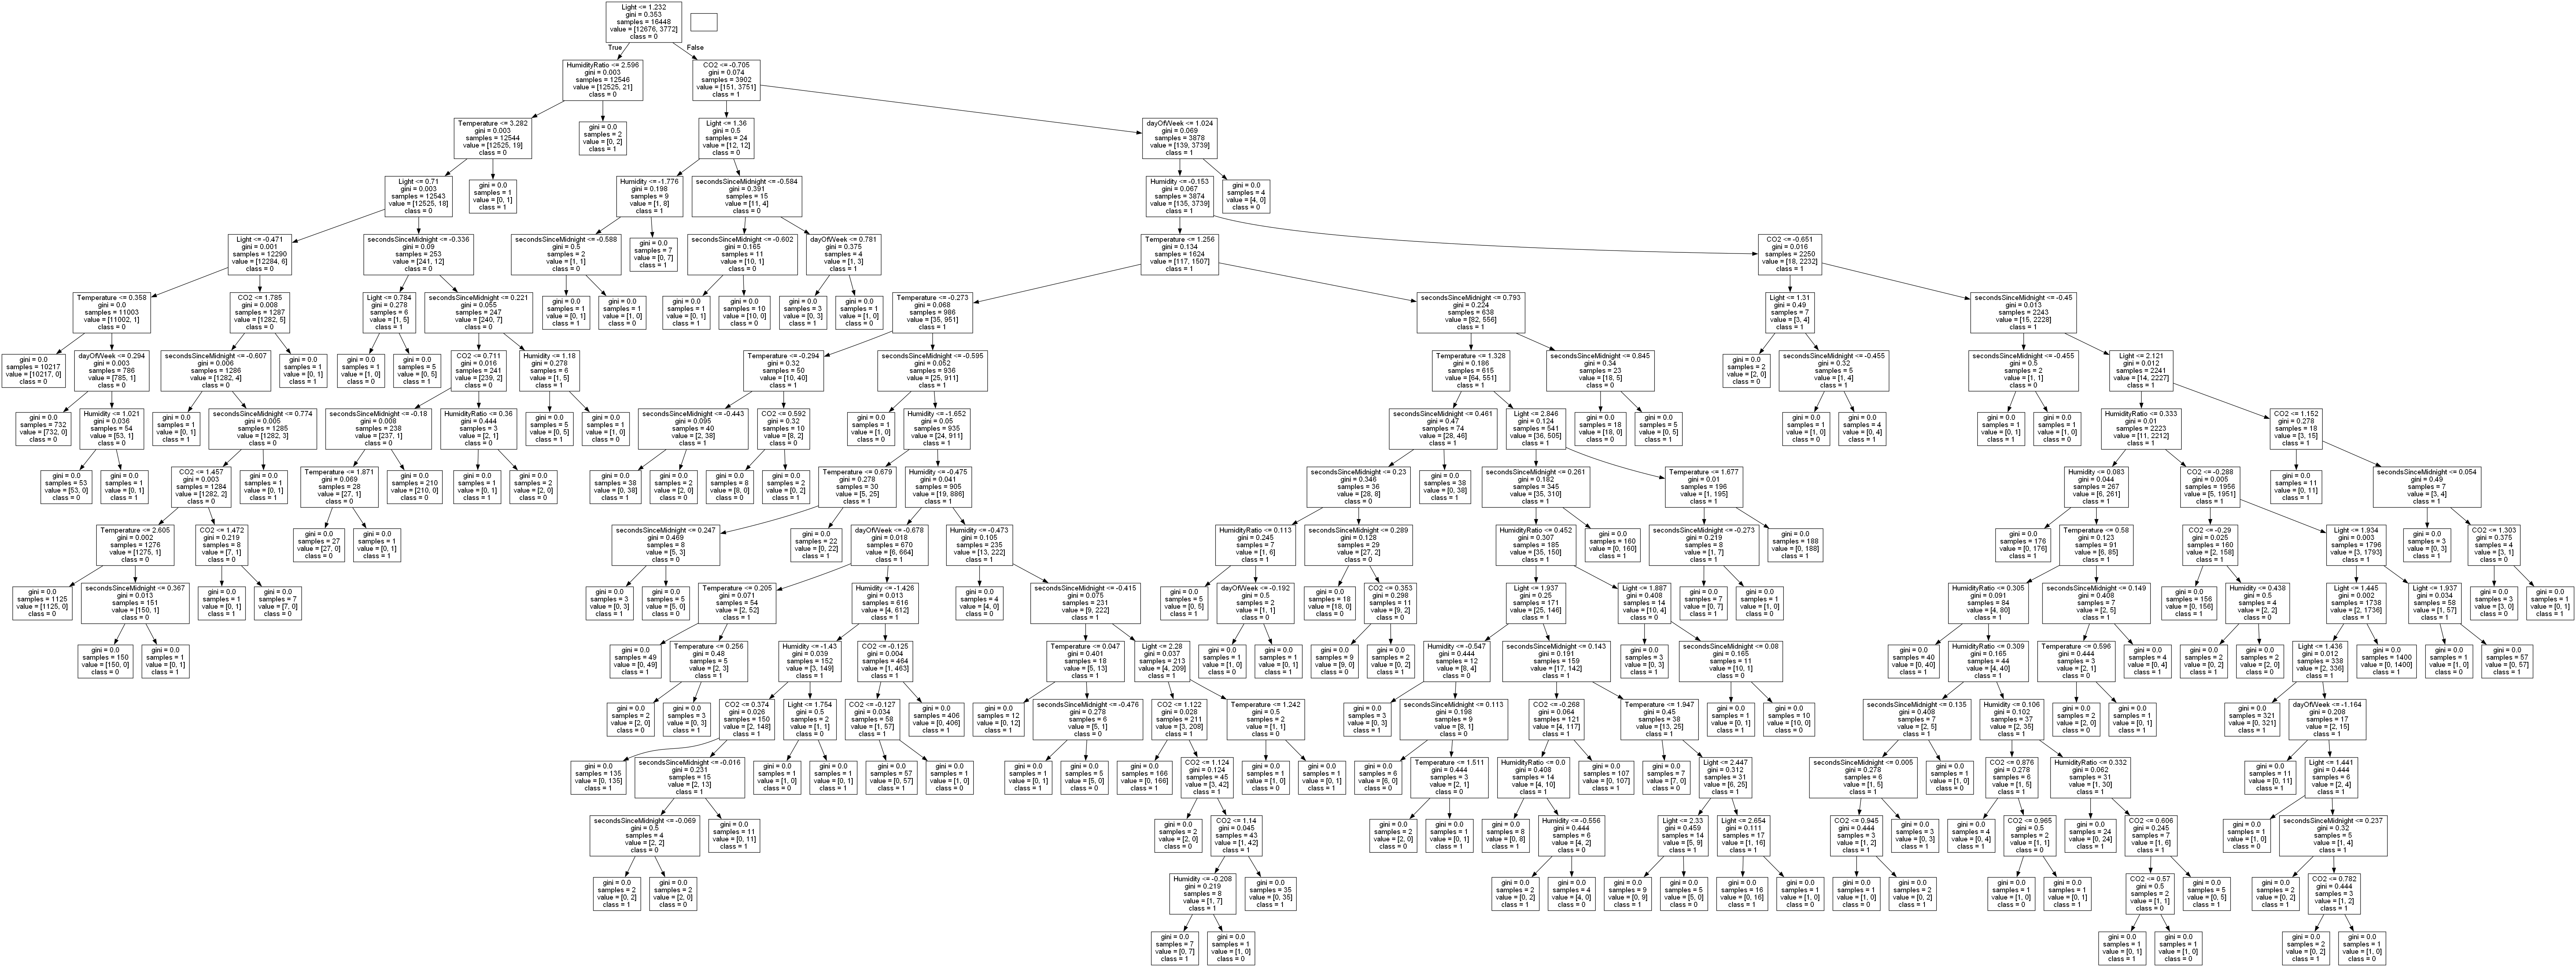

In [28]:
import pydotplus
from sklearn import tree
from IPython.display import Image

dot_data = tree.export_graphviz(decisionTree,
 out_file=None,
feature_names=data_features.columns,
 class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

Na slici je prikaz vizuelizacije stabla odluke koje je generisao algoritam. Stablo je veoma široko sa dosta grananja, tako da bi moguća optimizacija bila podešavanje parametara koji bi minimizovali broj odluka koje se moraju sprovesti pri klasifikaciji.

## <a id='toc1_5_'></a>[_Random Forest_ klasifikator](#toc0_)

_Random Forest_ klasifikator kreira više stabla odluke koje trenira nad podskupovima trening skupa, gde svako stablo odluke dobija drugačije funkcije odluke na grananjima. Na kraju bira najoptimalnije stablo, koje predstavlja istrenirani algoritam.

Sledeći deo koda predstavlja treniranje i evaluaciju _Random Forest_ klasifikatora nad istim skupom podataka sa istim transformacijama pri preprocesiranju:

In [29]:
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier(random_state=0, criterion="entropy") 

randomForestModel = randomForest.fit(data_train, target_train)

predRFC = randomForestModel.predict(data_test)

print("RandomForest accuracy : ",accuracy_score(target_test, predRFC, normalize = True))
print(confusion_matrix(target_test, predRFC))
report = classification_report(target_test,predRFC, digits=5)
with io.open('evaluation/classification_report_RandomForest_1.txt','w',encoding='utf-8') as f: f.write(report)

RandomForest accuracy :  0.9944066147859922
[[3117   17]
 [   6  972]]


Ovaj model postiže tačnost od 99,44%, što je bolje od _Decision Tree_ modela (99,27%).

#### <a id='toc1_5_1_1_'></a>[Optimizacija _Random Forest_ modela izborom relevantnih atributa](#toc0_)

_Random Forest_ model se može poboljšati izbacivanjem atributa koji manje utiču na klasifikaciju. Odluka o tome koje atribute treba izbaciti svodi se na ispitivanje važnosti atributa za već istrenirani model:

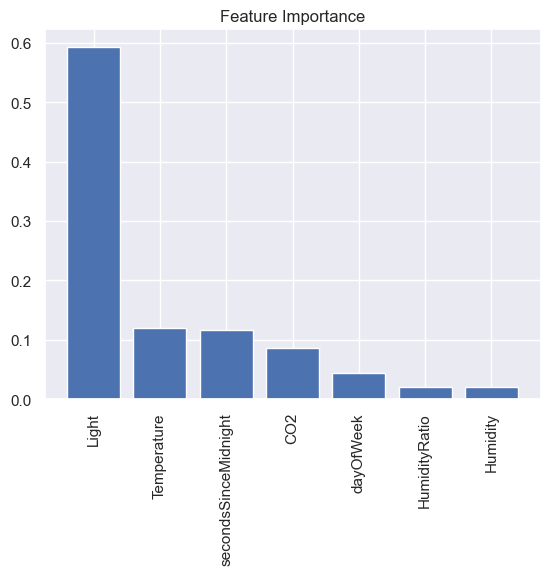

In [30]:
importances = randomForestModel.feature_importances_
indices = np.argsort(importances)[::-1]
names = [data_features.columns[i] for i in indices]

plt.figure()

plt.title("Feature Importance")

plt.bar(range(data_train.shape[1]), importances[indices])

plt.xticks(range(data_train.shape[1]), names, rotation=90)

plt.show()

Sa grafika se vidi da atribut _Light_ najviše utiče na rezultate klasifikacije. Atributi _Temperature_, _secondsSinceMidnight_ i _CO2_ imaju znatno manji uticaj na klasifikaciju, dok atributi _dayOfWeek_, _HumidityRatio_ i _Humidity_ gotovo da ne utiču na rezultate klasifikacije.

Iz tih razloga, izbacićemo sve atribute čiji je uticaj na klasifikaciju manji od 0,1.

Sledeći deo koda selektuje atribute koji imaju značaj veći od 0,1 i trenira novi model nad transformisanim skupom podataka:

In [31]:
from sklearn.feature_selection import SelectFromModel


def selectFeaturesRF(th):
    selector = SelectFromModel(randomForest, threshold=th) 

    features_important = selector.fit_transform(data_train, target_train)

    test_important = selector.transform(data_test)

    randomForestModel = randomForest.fit(features_important,target_train)

    predRFC = randomForestModel.predict(test_important)

    print("RandomForest accuracy : ",accuracy_score(target_test, predRFC, normalize = True))
    print(confusion_matrix(target_test, predRFC))
    report = classification_report(target_test,predRFC, digits=5)
    with io.open(f'evaluation/classification_report_RandomForest_Threshold_{th}.txt','w',encoding='utf-8') as f: f.write(report)

selectFeaturesRF(0.1)

RandomForest accuracy :  0.9929474708171206
[[3111   23]
 [   6  972]]


Modela sa izbačenim parametrima koji imaju uticaj na klasifikaciju manji od 0.1 ima manju preciznost u odnosu na model treniran sa tim parametrima (99,29% u odnosu na 99,44%).
Iz tog razloga pokušaćemo sa _threshold-om_ od 0.05.

In [32]:
selectFeaturesRF(0.05)

RandomForest accuracy :  0.9941634241245136
[[3118   16]
 [   8  970]]


Za _threshold_ od 0.05 dobijamo model čija je preciznost veća u odnosu na prethodni model, ali i dalje manja u odnosu na model koji uključuje sve atribute. Isprobaćemo treniranje modela sa _threshold-om_ od 0.025.

In [33]:
selectFeaturesRF(0.025)

RandomForest accuracy :  0.9946498054474708
[[3118   16]
 [   6  972]]


Tačnost ovako istreniranog modela je gotovo ista kao kod modela koji je nastao treniranjem nad skupom podataka sa uključenim atributima. Međutim, greška pri klasifikaciji (_false positives_ i _false negatives_) se neznatno ujednačila.

_Random Forest_ klasifikator ima još hiperparametara koje je moguće podesiti, i na osnovu dobijenih rezultata moguće je dodatno poboljšati model izmenom nekih hiperparametara.

## <a id='toc1_6_'></a>[_KNeighbors_ klasifikator](#toc0_)

_K-Nearest Neighbors_ klasifikator zaključuje klasu nekog uzorka na osnovu k-najbližih uzoraka oko njega. 

U sledećem isečku koda implementirano je treniranje _KNeighbors_ klasifikatora nad istim podacima kao do sada:

In [34]:
from sklearn.neighbors import KNeighborsClassifier

nearest_neighbors = KNeighborsClassifier(n_neighbors=3)

nnModel = nearest_neighbors.fit(data_train,target_train)

predNN = nnModel.predict(data_test)

print("KNeighbors accuracy : ",accuracy_score(target_test, predNN, normalize = True))
print(confusion_matrix(target_test, predNN))
report = classification_report(target_test,predNN, digits=5)
with io.open('evaluation/classification_report_KNeighbors_1.txt','w',encoding='utf-8') as f: f.write(report)

KNeighbors accuracy :  0.9919747081712063
[[3113   21]
 [  12  966]]


Ovaj algoritam daje neznatno slabiju preciznost u odnosu na _Random Forest_: 99,2%.

## <a id='toc1_7_'></a>[Naive Bayes](#toc0_)

_Naive Bayes_ algoritam je dobar kod dataset-ova gde su atributi međusobno nezavisni.

Sledeći isečak koda prikazuje primenu _Naive Bayes_ klasifikatora:

In [55]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()

nbModel = naive_bayes.fit(data_train,target_train)

predNB = nbModel.predict(data_test)

print("Naive Bayes accuracy : ",accuracy_score(target_test, predNB, normalize = True))
print(confusion_matrix(target_test, predNB))
report = classification_report(target_test,predNB, digits=5)
with io.open('evaluation/classification_report_Naive_Bayes_1.txt','w',encoding='utf-8') as f: f.write(report)

Naive Bayes accuracy :  0.9642509727626459
[[2990  144]
 [   3  975]]


Ovaj algoritam daje znatno slabiju preciznost u odnosu na prethodno isprobane modele: 96,43%.

## <a id='toc1_8_'></a>[Podešavanje hiperparametara](#toc0_)

Podešavanje hiperparametara je način da se model unapredi i prilagodi podacima koji su na raspolaganju.

Cilj je da se za svaki iskorišćeni model odradi izbor hiperparametara tako da sam model daje optimalne rezultate. 

Neki od dostupnih algoritama za pronalaženje najbolje kombinacije hiperparametara su _GridSearchCV_ i _RandomizedSearchCV_. Koristićemo _GridSearchCV_ za modele koji nisu vremenski zahtevni za ispitivanje, a _RandomizedSearchCV_ za modele koji zahtevaju dosta vremena za sračunavanje optimalne kombinacije hiperparametara.

#### <a id='toc1_8_1_1_'></a>[SVC](#toc0_)

Najbolja tačnost za SVC model istreniran bez podešavanja hiperparametara je 98,98%. Korišćenjem _RandomizedSearchCV_ biće izvršena optimizacija hiperparametara kako bi se poboljšala tačnost modela i smanjila greška pri klasifikaciji:

In [36]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import decomposition

svc_model = SVC()
hyperparameters = {'C': np.logspace(0,4,10), 
              'gamma': np.logspace(0,4,10,base=0.1),
             'kernel': ['rbf','poly','sigmoid']}
                 
rnd_search_cv = RandomizedSearchCV(svc_model,hyperparameters, cv=3, verbose=2, n_iter=100, random_state=1,
 n_jobs=-1)
best_SVC_model = rnd_search_cv.fit(data_train,target_train)
best_SVC_pred = best_SVC_model.predict(data_test)

print("Best SVC accuracy : ",accuracy_score(target_test, best_SVC_pred, normalize = True))
print(confusion_matrix(target_test, best_SVC_pred))
report = classification_report(target_test,best_SVC_pred, digits=5)
with io.open('evaluation/classification_report_best_SVC.txt','w',encoding='utf-8') as f: f.write(report)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best SVC accuracy :  0.9929474708171206
[[3113   21]
 [   8  970]]


Korišćenjem _RandomizedSearchCV_ model je optimizovan tako da postoji tačnost od 99,39%, što je za 0,4% veće od modela kreiranog bez optimizacije hiperparametara. Iz matrice zabune vidi se da se greška pri klasifikaciji svake klase ujednačila - od test skupa, model bez podešenih hiperparametara nepravilno je klasifikovao 2 uzorka kao klasu 1 umesto klase 0, a 40 uzoraka kao klasu 0 umesto klase 1. Sa podešenim hiperparametrima model klasifikuje 5 uzoraka kao klasu 1 umesto klase 0, ali zato klasifikuje 20 uzoraka kao klasu 0 umesto klase 1. Ovo predstavlja značajno poboljšanje u odnosu na prethodni model.

> Napomena: Kod _Support Vector_ klasifikatora, kao i kasnije kod _Random Forest_ klasifikatora nije iskorišćen _GridSearchCV_ iz razloga što vreme sračunavanja najboljeg modela prelazi 30 minuta na računarima koji su korišćeni za ispitivanje. Umesto njega koristi se _RandomizedSearchCV_ koji ubrzava vreme sračunavanja a daje slične ili skoro identične rezultate.

In [37]:
print("Best estimator: ", rnd_search_cv.best_estimator_)
print("Best index: ",rnd_search_cv.best_index_)
print("Best parameters: ",rnd_search_cv.best_params_)
print("Best score: ",rnd_search_cv.best_score_)
print("Parameter distributions: ",rnd_search_cv.param_distributions)
print("Support vector size: ",rnd_search_cv.best_estimator_.n_support_)

Best estimator:  SVC(C=1291.5496650148827, gamma=0.35938136638046275)
Best index:  3
Best parameters:  {'kernel': 'rbf', 'gamma': 0.35938136638046275, 'C': 1291.5496650148827}
Best score:  0.991853231070824
Parameter distributions:  {'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]), 'gamma': array([1.00000000e+00, 3.59381366e-01, 1.29154967e-01, 4.64158883e-02,
       1.66810054e-02, 5.99484250e-03, 2.15443469e-03, 7.74263683e-04,
       2.78255940e-04, 1.00000000e-04]), 'kernel': ['rbf', 'poly', 'sigmoid']}
Support vector size:  [169 185]


Iz odštampanih rezultata uočava se da najbolji SVC model koristi sledeće vrednosti:
- _kernel_: rbf
- _gamma_: 1
- _C_: 166.81005372000593

Broj _support_ vektora za klasu 0 iznosi 258, a za klasu 1 191, što je bolje u poređenju sa modelom koji nema podešene hiperparametre (254 za klasu 0 i 255 za klasu 1).

#### <a id='toc1_8_1_2_'></a>[_DecisionTree_](#toc0_)

Za _DecisionTree_ klasifikator iskorišćen je _GridSearchCV_ budući da ne zahteva mnogo vremena za izvršavanje. 

In [38]:
decisionTree = DecisionTreeClassifier(random_state=0)

params = {
    'max_depth': [2, 3, 5, 8,13,21],
    'min_samples_leaf': range(1,5),
    'min_samples_split': range(2,10),
    'max_features': [None, 'sqrt', 'log2'],
    'ccp_alpha': [0,0.1, .01, .001],
    'criterion': ["gini", "entropy"]
}

gs_cv_decision = GridSearchCV(decisionTree,params, cv=5, verbose=2,
 n_jobs=-1,scoring = 'accuracy')

best_DT_model = gs_cv_decision.fit(data_train,target_train)
best_DT_pred = best_DT_model.predict(data_test)

print("Best DT accuracy : ",accuracy_score(target_test, best_DT_pred, normalize = True))
print(confusion_matrix(target_test, best_DT_pred))
report = classification_report(target_test,best_DT_pred, digits=5)
with io.open('evaluation/classification_report_best_DT.txt','w',encoding='utf-8') as f: f.write(report)

Fitting 5 folds for each of 4608 candidates, totalling 23040 fits
Best DT accuracy :  0.9917315175097277
[[3115   19]
 [  15  963]]


Tačnost modela koji je dobijen pomoću _GridSearchCV_ je 99,17%, što je nešto gore u odnosu na model bez podešavanja hiperparametara (99,27%).

Uzimajući u obzir da _GridSearchCV_ koristi _Stratified K-fold cross-validation_ u izvršavanju, može se zaključiti da je dobijeni model bolji u odnosu na prethodni jer iako je smanjena tačnost, model nije _overfit_-ovan na podatke.

In [39]:
print("Best estimator: ", gs_cv_decision.best_estimator_)
print("Best index: ",gs_cv_decision.best_index_)
print("Best parameters: ",gs_cv_decision.best_params_)
print("Best score: ",gs_cv_decision.best_score_)
print("Parameter distributions: ",gs_cv_decision.param_grid)

print("\nModel info:")
print("Feature importances: ",gs_cv_decision.best_estimator_.feature_importances_)
print("Depth of tree: ",gs_cv_decision.best_estimator_.get_depth())

Best estimator:  DecisionTreeClassifier(ccp_alpha=0, criterion='entropy', max_depth=21,
                       min_samples_split=3, random_state=0)
Best index:  1057
Best parameters:  {'ccp_alpha': 0, 'criterion': 'entropy', 'max_depth': 21, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 3}
Best score:  0.9927652550964299
Parameter distributions:  {'max_depth': [2, 3, 5, 8, 13, 21], 'min_samples_leaf': range(1, 5), 'min_samples_split': range(2, 10), 'max_features': [None, 'sqrt', 'log2'], 'ccp_alpha': [0, 0.1, 0.01, 0.001], 'criterion': ['gini', 'entropy']}

Model info:
Feature importances:  [0.01414668 0.0132362  0.92055494 0.01078535 0.00763918 0.00388217
 0.02975547]
Depth of tree:  15


Iz odštampanih podataka o najboljem modelu vidi se da su za pretražene hiperparametre najbolje sledeće vrednosti:
- *ccp_alpha*: 0
- _criterion_: entropy
- *max_depth*: 21
- *max_features*: None
- *min_samples_leaf*: 1
- *min_samples_split*: 3

Sledeći isečak koda vizuelizuje stablo odluke dobijeno pomoću _GridSearchCV_:

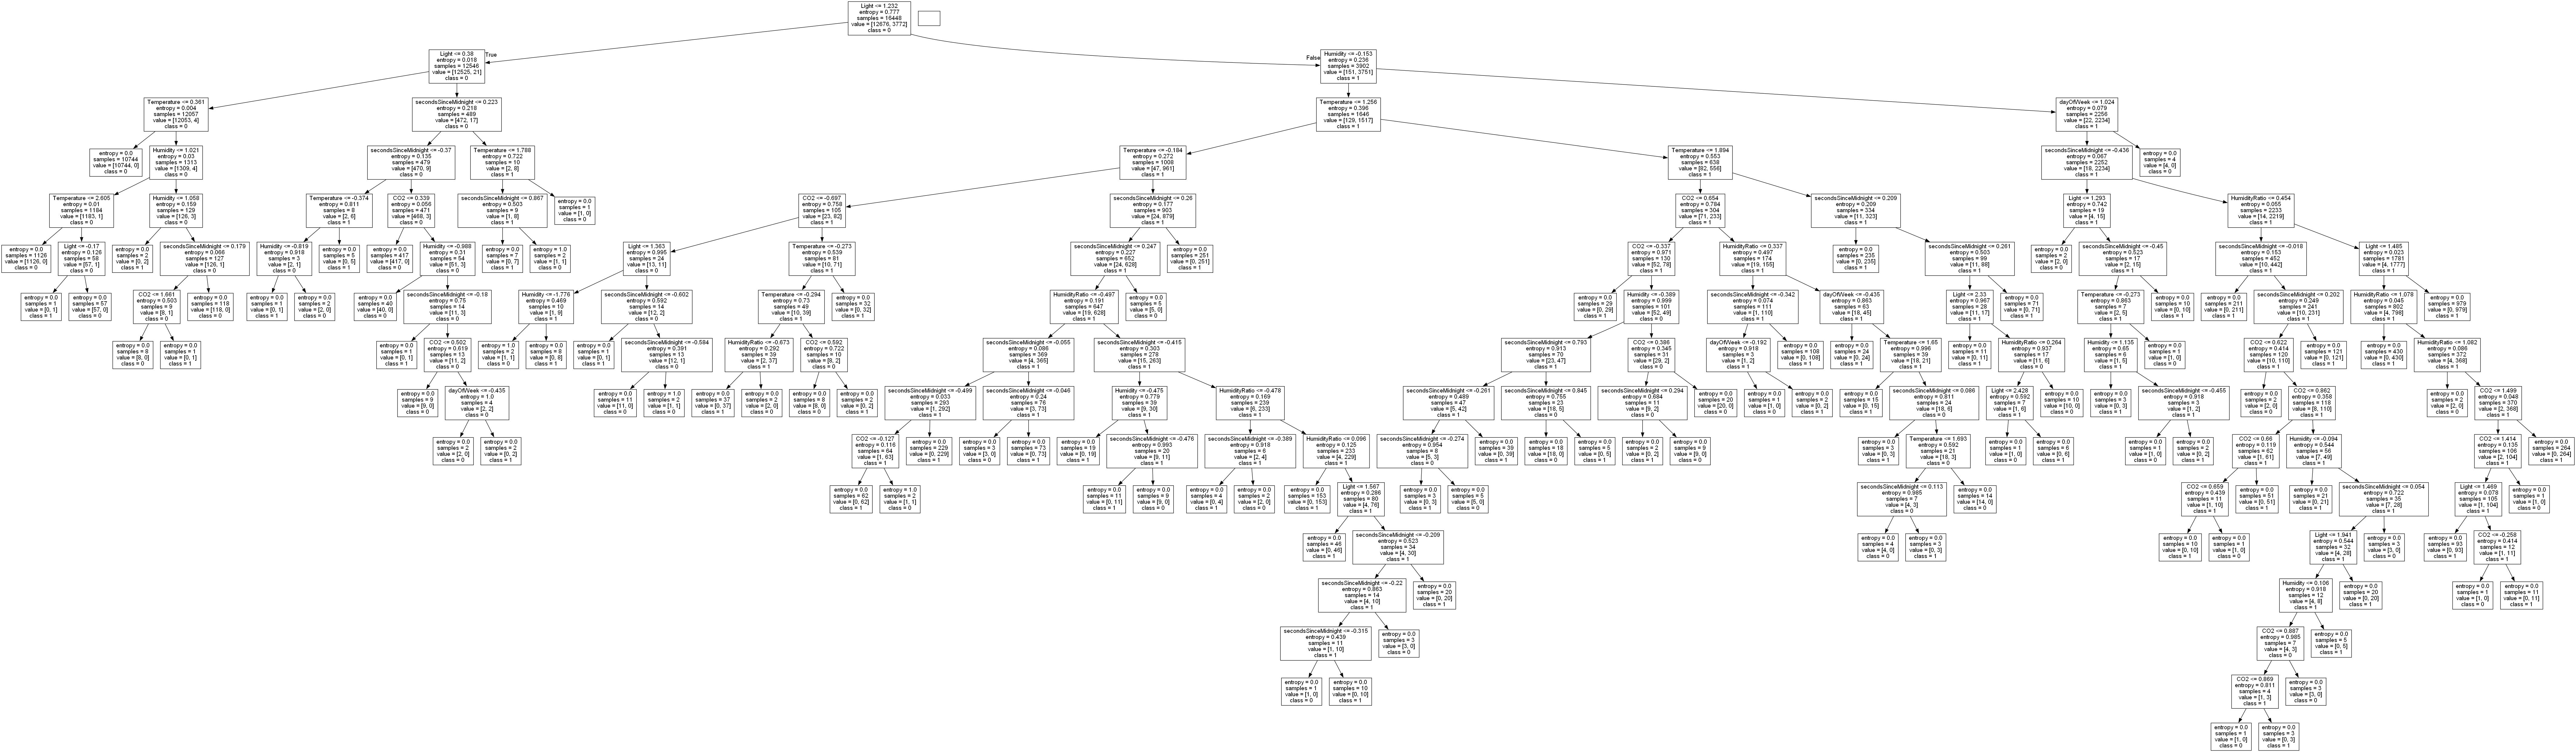

In [40]:
dt = DecisionTreeClassifier(ccp_alpha=0, criterion='entropy', max_depth=21,
                       min_samples_split=3, random_state=0).fit(data_train,target_train)

dot_data = tree.export_graphviz(dt,
 out_file=None,
feature_names=data_features.columns,
 class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

Sa slike se može videti da je ovo stablo znatno manje u odnosu na model gde nema podešavanja hiperparametara.

#### <a id='toc1_8_1_4_'></a>[_RandomForest_](#toc0_)

Budući da pretraga sa _GridSearchCV_ za _Random Forest_ klasifikator traje gotovo ceo sat, kao alternativa se koristi _RandomizedSearchCV_:

In [44]:
rf_model = RandomForestClassifier(random_state=0, criterion='entropy')


n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = range(2,10)

min_samples_leaf = range(1,5)

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
               }

rf_random = RandomizedSearchCV(rf_model,random_grid , cv = 3,random_state=0,n_iter=10 ,verbose=2, n_jobs = -1, scoring='accuracy')

best_rf_model = rf_random.fit(data_train,target_train)
best_rf_pred = best_rf_model.predict(data_test)

print("Best rf accuracy : ",accuracy_score(target_test, best_rf_pred, normalize = True))
print(confusion_matrix(target_test, best_rf_pred))
report = classification_report(target_test,best_rf_pred, digits=5)
with io.open('evaluation/classification_report_best_RF_.txt','w',encoding='utf-8') as f: f.write(report)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best rf accuracy :  0.9941634241245136
[[3115   19]
 [   5  973]]


Model koji nema podešavanje hiperparametara daje tačnost od 99,44%, dok model dobijen uz podešavanje hiperparametara daje tačnost od 99,42%. Sa druge strane, model koji je dobijen izdvajanjem nekih svojstava uz treshold 0,025 daje tačnost od 99,46%. Ovo pokazuje da se uz _RandomForest_ treba fokusirati na bitna svojstva. 

Sledeći isečak koda ispisuje dobijene vrednosti hiperparametara:

In [45]:
print("Best estimator: ", rf_random.best_estimator_)
print("Best index: ",rf_random.best_index_)
print("Best parameters: ",rf_random.best_params_)
print("Best score: ",rf_random.best_score_)
print("Parameter distributions: ",rf_random.param_distributions)

print("\nModel info:")
print("Feature importances: ",rf_random.best_estimator_.feature_importances_)
print("Number of trees: ",rf_random.best_estimator_.n_estimators)

Best estimator:  RandomForestClassifier(criterion='entropy', max_depth=80, min_samples_split=7,
                       n_estimators=2000, random_state=0)
Best index:  5
Best parameters:  {'n_estimators': 2000, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 80}
Best score:  0.9930691548145596
Parameter distributions:  {'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': range(2, 10), 'min_samples_leaf': range(1, 5)}

Model info:
Feature importances:  [0.13616775 0.01874641 0.56740202 0.09733885 0.02192939 0.04202492
 0.11639065]
Number of trees:  2000


#### <a id='toc1_8_1_5_'></a>[_KNeighbors_](#toc0_)

Budući da _K-Nearest Neighbors_ klasifikator uz _GridSearchCV_ ne zahteva mnogo vremena, koristi se _GridSearchCV_:

In [46]:
knn_model = KNeighborsClassifier()

hyperparameters = { 'n_neighbors': list(range(2, 31)),
               'weights': ['uniform','distance'],
               'metric': ['minkowski','euclidean','manhattan']}
grid_search_cv_knn = GridSearchCV(knn_model, hyperparameters, cv=10, verbose=2,
 n_jobs=-1,scoring="accuracy")
best_KNN_model = grid_search_cv_knn.fit(data_train, target_train)
print(best_KNN_model.best_params_)
best_KNN_pred = best_KNN_model.predict(data_test)

print("Best KNN accuracy : ",accuracy_score(target_test, best_KNN_pred, normalize = True))
print(confusion_matrix(target_test, best_KNN_pred))
report = classification_report(target_test,best_KNN_pred, digits=5)
with io.open('evaluation/classification_report_best_KNN_.txt','w',encoding='utf-8') as f: f.write(report)

Fitting 10 folds for each of 174 candidates, totalling 1740 fits
{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Best KNN accuracy :  0.9944066147859922
[[3118   16]
 [   7  971]]


_K-Nearest Neighbors_ model sa podešenim hiperparametrima daje tačnost od 99,44%, koristeći _Manhattan_ metriku za razdaljinu vektora i uzimajući 7 suseda u obzir pri klasifikaciji. Ovo je znatno bolji rezultat u odnosu na model koji ne koristi podešavanje hiperparametara, čija se tačnost svodi na 99,2%. 

In [47]:
print("Best estimator: ", grid_search_cv_knn.best_estimator_)
print("Best index: ",grid_search_cv_knn.best_index_)
print("Best parameters: ",grid_search_cv_knn.best_params_)
print("Best score: ",grid_search_cv_knn.best_score_)
print("Parameter distributions: ",grid_search_cv_knn.param_grid)

Best estimator:  KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')
Best index:  127
Best parameters:  {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Best score:  0.9941027888092651
Parameter distributions:  {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance'], 'metric': ['minkowski', 'euclidean', 'manhattan']}


#### <a id='toc1_8_1_6_'></a>[Naive Bayes](#toc0_)

Budući da _Naive Bayes_ klasifikator uz _GridSearchCV_ ne zahteva mnogo vremena, koristi se _GridSearchCV_:

In [48]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

naive_bayes = GaussianNB()

grid_search_cv_nb = GridSearchCV(naive_bayes, params_NB, cv=10, verbose=2,
 n_jobs=-1,scoring="accuracy")
best_NB_model = grid_search_cv_nb.fit(data_train, target_train)
print(best_NB_model.best_params_)
best_NB_pred = best_NB_model.predict(data_test)

print("Best NB accuracy : ",accuracy_score(target_test, best_NB_pred, normalize = True))
print(confusion_matrix(target_test, best_NB_pred))
report = classification_report(target_test,best_NB_pred, digits=5)
with io.open('evaluation/classification_report_best_NB_.txt','w',encoding='utf-8') as f: f.write(report)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
{'var_smoothing': 0.23101297000831597}
Best NB accuracy :  0.9693579766536965
[[3015  119]
 [   7  971]]


_Naive Bayes_ model sa podešenim hiperparametrima daje tačnost od 96.94%, koristeći *var_smoothing* vrednost od 0.23101297000831597. Ovo je malo bolji rezultat u odnosu na model koji ne koristi podešavanje hiperparametara, čija se tačnost svodi na 96.43%. 

In [49]:
print("Best estimator: ", grid_search_cv_nb.best_estimator_)
print("Best index: ",grid_search_cv_nb.best_index_)
print("Best parameters: ",grid_search_cv_nb.best_params_)
print("Best score: ",grid_search_cv_nb.best_score_)
print("Parameter distributions: ",grid_search_cv_nb.param_grid)

Best estimator:  GaussianNB(var_smoothing=0.23101297000831597)
Best index:  7
Best parameters:  {'var_smoothing': 0.23101297000831597}
Best score:  0.9709998964642542
Parameter distributions:  {'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31012970e-02, 1.87381742e-02,
       1.51991108e-02, 1.23284674e-02, 1.00000000e-02, 8.11130831e-03,
       6.57933225e-03, 5.33669923e-03, 4.32876128e-03, 3.51119173e-03,
       2.84803587e-03, 2.31012970e-03, 1.87381742e-03, 1.51991108e-03,
       1.23284674e-03, 1.00000000e-03, 8.11130831e-04, 6.57933225e-04,
       5.33669923e-04, 4.32876128e-04, 3.51119173e-04, 2.84803587e-04,
       2.31012970e-04, 1.87381742e-04, 1.51991108e-04, 1.23284674e-04,
       1

## <a id='toc1_9_'></a>[Balansiranje klasa u skupu podataka](#toc0_)

Budući da je skup podataka veoma nebalansiran (77% uzoraka pripada klasi 0 dok 23% pripada klasi 1), poželjno je isprobati sve modele uz upotrebu hiperparametra _class_weight_, čije će potencijalne vrednosti biti _balanced_ i _None_ (što je _default_ vrednost).

#### <a id='toc1_9_1_1_'></a>[Balansiranje SVC modela](#toc0_)

In [50]:
svc_model = SVC()
hyperparameters = {'C': np.logspace(0,4,10), 
              'gamma': np.logspace(0,4,10,base=0.1),
              'kernel': ['rbf'],
              'class_weight': ['balanced', None]} 
grid_search_cv = RandomizedSearchCV(svc_model,hyperparameters,cv=5, verbose=0, random_state=1, n_iter=100,
 n_jobs=-1)
best_SVC_model = grid_search_cv.fit(data_train,target_train)
best_SVC_pred = best_SVC_model.predict(data_test)

print("Best SVC accuracy : ",accuracy_score(target_test, best_SVC_pred, normalize = True))
print(confusion_matrix(target_test, best_SVC_pred))

Best SVC accuracy :  0.993920233463035
[[3114   20]
 [   5  973]]


Iz izvršenja prethodnog isečka koda uočava se da SVC model ne daje bolju tačnost uz balansiranje skupa podataka.

In [51]:
print("Best estimator: ", grid_search_cv.best_estimator_)
print("Best index: ",grid_search_cv.best_index_)
print("Best parameters: ",grid_search_cv.best_params_)
print("Best score: ",grid_search_cv.best_score_)
print("Parameter distributions: ",grid_search_cv.param_distributions)
print("Support vector size: ",grid_search_cv.best_estimator_.n_support_)

Best estimator:  SVC(C=166.81005372000593, gamma=1.0)
Best index:  14
Best parameters:  {'kernel': 'rbf', 'gamma': 1.0, 'class_weight': None, 'C': 166.81005372000593}
Best score:  0.9930083607419409
Parameter distributions:  {'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]), 'gamma': array([1.00000000e+00, 3.59381366e-01, 1.29154967e-01, 4.64158883e-02,
       1.66810054e-02, 5.99484250e-03, 2.15443469e-03, 7.74263683e-04,
       2.78255940e-04, 1.00000000e-04]), 'kernel': ['rbf'], 'class_weight': ['balanced', None]}
Support vector size:  [258 191]


#### <a id='toc1_9_1_2_'></a>[Balansiranje _DecisionTree_ modela](#toc0_)

In [52]:
decisionTree = DecisionTreeClassifier(random_state=0)

params = {
    'max_depth': [2, 3, 5, 8,13,21],
    'min_samples_leaf': range(1,5),
    'min_samples_split': range(2,10),
    'max_features': [None, 'sqrt', 'log2'],
    'ccp_alpha': [0,0.1, .01, .001],
    'criterion': ["gini", "entropy"],
    'class_weight': ['balanced', None]
}

gs_cv_decision = GridSearchCV(decisionTree,params, cv=5, verbose=2,
 n_jobs=-1,scoring = 'accuracy')

best_DT_model = gs_cv_decision.fit(data_train,target_train)
best_DT_pred = best_DT_model.predict(data_test)

print("Best DT accuracy : ",accuracy_score(target_test, best_DT_pred, normalize = True))
print(confusion_matrix(target_test, best_DT_pred))

Fitting 5 folds for each of 9216 candidates, totalling 46080 fits
Best DT accuracy :  0.9924610894941635
[[3113   21]
 [  10  968]]


Rezultat izvršenja prethodnog dela koda pokazuje da je GridSearchCV ustanovio da se DecisionTree model bolje ponaša uz balansiranje podataka. To je dovelo do neznatnog povećanja tačnosti modela (99,25% u odnosu na 99,19%).

In [53]:
print("Best estimator: ", gs_cv_decision.best_estimator_)
print("Best index: ",gs_cv_decision.best_index_)
print("Best parameters: ",gs_cv_decision.best_params_)
print("Best score: ",gs_cv_decision.best_score_)
print("Parameter distributions: ",gs_cv_decision.param_grid)

print("\nModel info:")
print("Feature importances: ",gs_cv_decision.best_estimator_.feature_importances_)
print("Depth of tree: ",gs_cv_decision.best_estimator_.get_depth())

Best estimator:  DecisionTreeClassifier(ccp_alpha=0, class_weight='balanced',
                       criterion='entropy', max_depth=21, min_samples_split=6,
                       random_state=0)
Best index:  1060
Best parameters:  {'ccp_alpha': 0, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 21, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 6}
Best score:  0.9936771646484874
Parameter distributions:  {'max_depth': [2, 3, 5, 8, 13, 21], 'min_samples_leaf': range(1, 5), 'min_samples_split': range(2, 10), 'max_features': [None, 'sqrt', 'log2'], 'ccp_alpha': [0, 0.1, 0.01, 0.001], 'criterion': ['gini', 'entropy'], 'class_weight': ['balanced', None]}

Model info:
Feature importances:  [0.01503867 0.00656167 0.94447794 0.00791501 0.00394729 0.00518196
 0.01687746]
Depth of tree:  17


#### <a id='toc1_9_1_3_'></a>[Balansiranje _RandomForest_ modela](#toc0_)

In [54]:
rf_model = RandomForestClassifier(random_state=0, criterion='entropy')

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'class_weight': ['balanced', None]
               }

rf_random = RandomizedSearchCV(rf_model, random_grid, cv = 3, verbose=2, n_jobs = -1, n_iter=10, random_state=1, scoring='accuracy')

best_rf_model = rf_random.fit(data_train,target_train)
best_rf_pred = best_rf_model.predict(data_test)

print("Best rf accuracy : ",accuracy_score(target_test, best_rf_pred, normalize = True))
print(confusion_matrix(target_test, best_rf_pred))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


KeyboardInterrupt: 

Rezultat izvršenja prethodnog dela koda pokazuje da se _RandomForest_ model ne ponaša bolje uz balansiranje podataka.

In [ ]:
print("Best estimator: ", rf_random.best_estimator_)
print("Best index: ",rf_random.best_index_)
print("Best parameters: ",rf_random.best_params_)
print("Best score: ",rf_random.best_score_)
print("Parameter distributions: ",rf_random.param_distributions)

print("\nModel info:")
print("Feature importances: ",rf_random.best_estimator_.feature_importances_)
print("Number of trees: ",rf_random.best_estimator_.n_estimators)

Best estimator:  RandomForestClassifier(criterion='entropy', max_depth=50, max_features='auto',
                       min_samples_split=5, n_estimators=1200, random_state=0)
Best index:  4
Best parameters:  {'n_estimators': 1200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 50, 'class_weight': None}
Best score:  0.993069143724817
Parameter distributions:  {'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'class_weight': ['balanced', None]}

Model info:
Feature importances:  [0.1356929  0.01872818 0.57330405 0.0995836  0.02106798 0.03947499
 0.11214832]
Number of trees:  1200


### <a id='toc1_9_2_'></a>[Zaključak](#toc0_)

U okviru podešavanja hiperparametara isprobani su _GridSearchCV_ i _RandomizedSearchCV_ na modelima SVC, _DecisionTree_, _RandomForest_ i _K-Nearest Neighbors_. 

Za SVC, primećuje se znatno poboljšanje u tačnosti modela uz kalibraciju hiperparametara, dok se kod _DecisionTree_ modela tačnost ne povećava preterano ali se zato smanjuje veličina stabla. Za _RandomForest_ model, tačnost se neznatno smanjuje, te je najbolje staviti akcenat na izdvajanje najbitnijih svojstava koja utiču na klasifikaciju, što je i odrađeno pre podešavanja hiperparametara. Na kraju, za _K-Nearest Neighbors_ model tačnost se takođe znatno povećala uz podešavanje hiperparametara.

Pri isprobavanju varijanti sa balansiranjem skupa podataka, uočeno je da se samo _DecisionTree_ model ponaša bolje uz balansiranje podataka, dok su SVC i _RandomForest_ modeli imali iste rezultate. _K-Nearest Neighbors_ model ne poseduje opciju balansiranja podataka budući da to nema mnogo smisla.

## <a id='toc1_10_'></a>[Feature selection / reduction](#toc0_)

Kako bi se dobio što bolji model, poželjno je ispitati da li promena broja atributa utiče na rezultate modela. U te svrhe biće isprobani _Principal Component Analysis_ (PCA), _Variance Treshold_ (VT), _Select Percentile_ (_SelectP_) i _Recursive Feature Elimination_.

_Linear Discriminant Analysis_ nije moguće raditi jer su klase u okviru _dataset_-a linearno separabilne (što se dokazuje primenom Linearnog SVC algoritma koji daje dobre rezultate). _Non-Negative Matrix Factorization_ nije moguće uraditi iz razloga što se nakon skaliranja podataka u datasetu nalaze i negativne vrednosti. Ove dve tehnike su stoga odbačene.

#### <a id='toc1_10_1_1_'></a>[PCA](#toc0_)

_Principle Component Analysis_ (PCA) koristi se kao tehnika redukcije dimenzionalnosti problema i posebno je pogodna za probleme sa velikim brojem dimenzija. _Dataset_ za ovaj projekat ima 7 dimenzija, što nije veliki broj. Vredi pokušati sa smanjenjem dimenzija iz eksperimentalnih razloga, kako bi se posmatralo ponašanje isprobanih modela.

In [125]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold


pca = decomposition.PCA(n_components=0.99)

def PCA_selection(model,modelName,test=False):
    pipe = Pipeline(steps=[('pca', pca),
                           ('model', model)])
    model = pipe.fit(data_train,target_train)
    prediction = model.predict(data_test)
    print(f"Best {modelName} accuracy : ",accuracy_score(target_test, prediction, normalize = True))
    if(test):
        print(model[1].n_features_in_)

svc = SVC(C=166.81005372000593, gamma=1,probability=True)
decisionTree = DecisionTreeClassifier(ccp_alpha=0, class_weight='balanced',
                       criterion='entropy', max_depth=21, min_samples_split=6,
                       random_state=0)
randomForest = RandomForestClassifier(criterion='entropy', max_depth=80, max_features='sqrt',
                       min_samples_split=7, n_estimators=2000, random_state=0)
knn=KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')
naive_bayes = GaussianNB()

PCA_selection(svc,"SVC",True)
PCA_selection(decisionTree,"Decision Tree")
PCA_selection(randomForest,"Random Forest")
PCA_selection(knn,"KNeighbors")
PCA_selection(naive_bayes,"Naive Bayes")

Best SVC accuracy :  0.993920233463035
6
Best Decision Tree accuracy :  0.9897859922178989
Best KNeighbors accuracy :  0.9936770428015564
Best Naive Bayes accuracy :  0.9900291828793775


In [58]:
naive_bayes_hp = GaussianNB(var_smoothing=0.23101297000831597)
PCA_selection(naive_bayes_hp,"Naive Bayes w/ hyperparameters")

Best Naive Bayes w/ hyperparameters accuracy :  0.9686284046692607


PCA algoritam je odlučio da je najoptimalniji broj komponenti 6. Dobijeni modeli predstavljaju poboljšanje kada su u pitanju SVC i _Naive Bayes_, gde _Naive Bayes_ dobija poboljšanje tačnosti od skoro 3%.

In [59]:
decisionTreePCA = DecisionTreeClassifier(random_state=0)
pca = decomposition.PCA()

pipe = Pipeline(steps=[
                           ('pca', pca),
                           ('dec_tree', decisionTreePCA)])

n_components = list(range(1,data_train.shape[1]+1,1))


criterion = ['gini', 'entropy']
max_depth = [2, 3, 5, 8,13,21]
class_weight= ['balanced', None]

parameters = dict(pca__n_components=n_components,
                      dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth,
                      dec_tree__class_weight=class_weight)

gs_cv_decision = GridSearchCV(pipe,parameters, cv=5, verbose=2,
 n_jobs=-1)
best_DT_model = gs_cv_decision.fit(data_train,target_train)
best_DT_pred = best_DT_model.predict(data_test)

print("Best DT + Pipeline accuracy : ",accuracy_score(target_test, best_DT_pred, normalize = True))
print(confusion_matrix(target_test, best_DT_pred))
report = classification_report(target_test,best_DT_pred, digits=5)
with io.open('evaluation/classification_report_best_DT_Pipeline.txt','w',encoding='utf-8') as f: f.write(report)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
Best DT + Pipeline accuracy :  0.9919747081712063
[[3112   22]
 [  11  967]]


Gornji isečak koda predstavlja pokušaj nalaženja najboljih hiperparametara za _Decision Tree_ model u slučaju kada se primenjuje PCA koji smanjuje dimenzionalnost problema na 6 komponenti. Dobija se model koji ima manju tačnost, tako da je ovaj pristup odbačen.

In [60]:
print("Best estimator: ", gs_cv_decision.best_estimator_)
print("Best index: ",gs_cv_decision.best_index_)
print("Best parameters: ",gs_cv_decision.best_params_)
print("Best score: ",gs_cv_decision.best_score_)
print("Parameter distributions: ",gs_cv_decision.param_grid)

print("\nModel info:")
print("Feature importances: ",gs_cv_decision.best_estimator_[1].feature_importances_)
print("Depth of tree: ",gs_cv_decision.best_estimator_[1].get_depth())

Best estimator:  Pipeline(steps=[('pca', PCA(n_components=6)),
                ('dec_tree',
                 DecisionTreeClassifier(criterion='entropy', max_depth=8,
                                        random_state=0))])
Best index:  152
Best parameters:  {'dec_tree__class_weight': None, 'dec_tree__criterion': 'entropy', 'dec_tree__max_depth': 8, 'pca__n_components': 6}
Best score:  0.9911236959155554
Parameter distributions:  {'pca__n_components': [1, 2, 3, 4, 5, 6, 7], 'dec_tree__criterion': ['gini', 'entropy'], 'dec_tree__max_depth': [2, 3, 5, 8, 13, 21], 'dec_tree__class_weight': ['balanced', None]}

Model info:
Feature importances:  [0.54821731 0.04302091 0.01837753 0.13641921 0.00894776 0.24501727]
Depth of tree:  8


In [61]:
pipe = Pipeline(steps=[
                           ('pca', pca),
                           ('naive_bayes', naive_bayes)])

n_components = list(range(1,data_train.shape[1]+1,1))
var_smoothing = np.logspace(0, -9, num=100)


parameters = dict(pca__n_components=n_components, naive_bayes__var_smoothing=var_smoothing)

gs_cv_nb = GridSearchCV(pipe,parameters, cv=10, verbose=2,
 n_jobs=-1)
best_NB_model = gs_cv_nb.fit(data_train,target_train)
best_NB_pred = best_NB_model.predict(data_test)

print("Best NB + Pipeline accuracy : ",accuracy_score(target_test, best_NB_pred, normalize = True))
print(confusion_matrix(target_test, best_NB_pred))
report = classification_report(target_test,best_NB_pred, digits=5)
with io.open('evaluation/classification_report_best_NB_Pipeline.txt','w',encoding='utf-8') as f: f.write(report)

Fitting 10 folds for each of 700 candidates, totalling 7000 fits
Best NB + Pipeline accuracy :  0.9897859922178989
[[3096   38]
 [   4  974]]


Gornji isečak koda predstavlja pokušaj nalaženja najboljih hiperparametara za _Naive Bayes_ algoritam u slučaju smanjenja dimenzija problema pomoću PCA. Dobijeni model ima tačnost koja je približna prethodnoj primeni _Naive Bayes_ algoritma (bez traženja hiperparametara).

In [62]:
print("Best estimator: ", gs_cv_nb.best_estimator_)
print("Best index: ",gs_cv_nb.best_index_)
print("Best parameters: ",gs_cv_nb.best_params_)
print("Best score: ",gs_cv_nb.best_score_)
print("Parameter distributions: ",gs_cv_nb.param_grid)

Best estimator:  Pipeline(steps=[('pca', PCA(n_components=6)),
                ('naive_bayes', GaussianNB(var_smoothing=0.01519911082952933))])
Best index:  145
Best parameters:  {'naive_bayes__var_smoothing': 0.01519911082952933, 'pca__n_components': 6}
Best score:  0.9899686064828168
Parameter distributions:  {'pca__n_components': [1, 2, 3, 4, 5, 6, 7], 'naive_bayes__var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31012970e-02, 1.87381742e-02,
       1.51991108e-02, 1.23284674e-02, 1.00000000e-02, 8.11130831e-03,
       6.57933225e-03, 5.33669923e-03, 4.32876128e-03, 3.51119173e-03,
       2.84803587e-03, 2.31012970e-03, 1.87381742e-03, 1.51991108e-03,
       1.23284674e-03, 1.00000000e-03, 8.111

#### <a id='toc1_10_1_2_'></a>[_VarianceThreshold_](#toc0_)

_Variance Threshold_ algoritam koristi varijansu nekog atributa kako bi se izbacili atributi sa varijansom manjom od specificirane. Ideja je da podaci koji manje variraju imaju i manji značaj pri klasifikaciji nekog uzorka.

In [63]:
from sklearn.feature_selection import VarianceThreshold

print(data.var())

data_train_VT,data_test_VT,target_train_VT,target_test_VT = train_test_split(data_features,target,test_size=0.2,random_state=10)

thresholder = VarianceThreshold(threshold=.5)
data_train_VT = thresholder.fit_transform(data_train_VT)
data_test_VT = thresholder.transform(data_test_VT)

print("\nColumn number: ", len(data_train_VT[0]),"\n")

scaler = preprocessing.StandardScaler()
data_train_VT = scaler.fit_transform(data_train_VT)
data_test_VT = scaler.transform(data_test_VT)

def VT_selection(model,modelName):
    modelTrained = model.fit(data_train_VT,target_train)
    prediction = modelTrained.predict(data_test_VT)
    print(f"Best {modelName} accuracy : ",accuracy_score(target_test, prediction, normalize = True))

VT_selection(svc,"SVC")
VT_selection(decisionTree,"Decision Tree")
VT_selection(randomForest,"Random Forest")
VT_selection(knn,"KNeighbors")
VT_selection(naive_bayes,"Naive Bayes")
VT_selection(naive_bayes_hp,"Naive Bayes w/ hyperparameters")

C:\Users\Nikola\AppData\Local\Temp\ipykernel_964\2178639203.py:3: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.var())


Temperature             1.113689e+00
Humidity                2.482185e+01
Light                   4.428115e+04
CO2                     9.684624e+04
HumidityRatio           5.896228e-07
Occupancy               1.776644e-01
dayOfWeek               4.240872e+00
secondsSinceMidnight    6.501449e+08
dtype: float64

Column number:  6 

Best SVC accuracy :  0.993920233463035
Best Decision Tree accuracy :  0.9931906614785992
Best Random Forest accuracy :  0.9941634241245136
Best KNeighbors accuracy :  0.9941634241245136
Best Naive Bayes accuracy :  0.9627918287937743
Best Naive Bayes accuracy :  0.9669260700389105


Najpre se štampaju vrednosti varijansi za svaki atribut *dataset*-a. Uočava se da najmanju varijansu poseduje _HumidityRatio_ atribut. 

Zatim se vrši izbacivanje atributa čija je varijansa manja od 0.5, što uključuje samo _HumidityRatio_.

Na kraju, treniraju se i evaluiraju modeli. U slučaju SVC, _Decision Tree_ i _Random Forest_ modela, dobija se najbolja tačnost klasifikacije do sada. 

> Napomena: Ispitana su dva _Naive Bayes_ algoritma, jedan bez podešavanja hiperparametara i drugi sa podešavanjem hiperparametara. Razlika između njihovih tačnosti je 0,4% što nije velika cifra.

#### <a id='toc1_10_1_3_'></a>[_Highly Correlated Matrix Feature Reduction_](#toc0_)

Kada su u pitanju podaci sa visokim nivoom korelacije, korisno je upotrebiti redukciju dimenzionalnosti na osnovu matrice korelacije.

In [ ]:
corr_matrix = data_features.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),
 k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
data_features_HCF = data_features.drop(data_features[to_drop],axis=1)
data_features_HCF.head(3)

## HumidityRatio je sklonjen, rezultati ce biti isti kao gore

,Temperature,Humidity,Light,CO2,dayOfWeek,secondsSinceMidnight
140,23.700,26.272,585.200000,749.200000,0,51540
141,23.718,26.290,578.400000,760.400000,0,51599
142,23.730,26.230,572.666667,769.666667,0,51660


Budući da se ovom tehnikom sklanja _HumidityRatio_ atribut kao kod _Variance Threshold_, zaključuje se da će i rezultati klasifikacije i evaluacije modela biti isti.

#### <a id='toc1_10_1_4_'></a>[_SelectPercentile_](#toc0_)

_SelectPercentile_ je tehnika koja isključuje one atribute _dataset_-a za koje se smatra da imaju mali uticaj na klasifikaciju. U slučaju numeričkih podataka (kakav je i _dataset_ za ovaj projekat) koristi se _f-classif_ funkcija za određivanje količine informacija koje neki atribut sadrži vezano za klasu kojoj uzorak pripada. 

In [65]:
from sklearn.feature_selection import SelectKBest,SelectPercentile
from sklearn.feature_selection import f_classif

f_classif_selector = SelectPercentile(f_classif, percentile=90)
data_features_selectP = f_classif_selector.fit_transform(data_features, target)
# Show results
print("Original number of features:", data_train.shape[1])
print("Reduced number of features:", data_features_selectP.shape[1])

print(data_features.columns)
print(data_features.head(1))
print(data_features_selectP[0],"\n")

data_train_selectP,data_test_selectP,target_train_selectP,target_test_selectP = train_test_split(data_features_selectP,target,test_size=0.2,random_state=10)

scaler = preprocessing.StandardScaler()

data_train_selectP = scaler.fit_transform(data_train_selectP)
data_test_selectP = scaler.transform(data_test_selectP)

def SelectP_selection(model,modelName):
    modelTrained = model.fit(data_train_selectP,target_train_selectP)
    prediction = modelTrained.predict(data_test_selectP)
    print(f"Best {modelName} accuracy : ",accuracy_score(target_test_selectP, prediction, normalize = True))


SelectP_selection(svc,"SVC")
SelectP_selection(decisionTree,"Decision Tree")
SelectP_selection(randomForest,"Random Forest")
SelectP_selection(knn,"KNeighbors")
SelectP_selection(naive_bayes,"Naive Bayes")
SelectP_selection(naive_bayes_hp,"Naive Bayes w/ hyperparameters")

Original number of features: 7
Reduced number of features: 6
Index(['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'dayOfWeek',
       'secondsSinceMidnight'],
      dtype='object')
     Temperature  Humidity  Light    CO2  HumidityRatio  dayOfWeek  \
140         23.7    26.272  585.2  749.2       0.004764          0   

     secondsSinceMidnight  
140                 51540  
[2.37000000e+01 5.85200000e+02 7.49200000e+02 4.76416302e-03
 0.00000000e+00 5.15400000e+04] 

Best SVC accuracy :  0.9936770428015564
Best Decision Tree accuracy :  0.9929474708171206
Best Random Forest accuracy :  0.993920233463035
Best KNeighbors accuracy :  0.9944066147859922
Best Naive Bayes accuracy :  0.9630350194552529
Best Naive Bayes w/ hyperparameters accuracy :  0.9666828793774319


_SelectPercentile_ je odredio da _secondsSinceMidnight_ ne sadrži bitne informacije za određivanje klase nekog uzorka, i stoga je ovaj atribut odbačen. 

Rezultati treniranja modela sa ovako transformisanim _dataset_-om pokazuju da se poboljšanje tačnosti dobija kod _KNearest Neighbours_ algoritma.

#### <a id='toc1_10_1_5_'></a>[_Recursive Feature Elimination_](#toc0_)

RFE algoritam koristi rekurzivno smanjivanje atributa _dataset_-a kako bi poboljšao performanse modela. Korišćenjem _cross-validation_ tehnike se ispituje poboljšanje ili pogoršanje performansi modela, a _scikit-learn_ nudi implementaciju RFECV u te svrhe.

Ovaj algoritam ima smisla primenjivati samo kod _Decision Tree_ i _Random Forest_ modela.

In [103]:
from sklearn.feature_selection import RFE

rfeDT = RFE(estimator=decisionTree)
rfeDT_model = rfeDT.fit(data_train, target_train)
rfeDT_pred = rfeDT_model.predict(data_test)
print("Best number of features in DecisionTree: ",rfeDT.n_features_)
print("Accuracy : ",accuracy_score(target_test, rfeDT_pred, normalize = True))

Best number of features in DecisionTree:  3
Accuracy :  0.9919747081712063


In [ ]:
rfeRF = RFE(estimator=randomForest)
rfeRF_model = rfeRF.fit(data_train, target_train)
rfeRF_pred= rfeRF_model.predict(data_test)
print("Best number of features in RandomForest: ",rfeRF.n_features_)
print("Accuracy : ",accuracy_score(target_test, rfeRF_pred, normalize = True))

Best number of features in RandomForest:  6
Accuracy :  0.993920233463035


N_features_to_select je po default-u stavljeno na polovini broja features (7/2=3). Prolazimo kroz for loop da vidimo koji broj features daje najbolji accuracy

In [132]:
def get_RFE_Features(estimator,numFeatures,modelName):
    rfe = RFE(estimator=estimator,n_features_to_select=numFeatures)
    rfe_model = rfe.fit(data_train, target_train)
    rfe_pred = rfe_model.predict(data_test)
    print(f"Number of features in {modelName}: ",rfe.n_features_)
    print("Accuracy : ",accuracy_score(target_test, rfe_pred, normalize = True))

In [133]:
for x in range(1,8):
    get_RFE_Features(decisionTree,x,"DecisionTree")

Number of features in DecisionTree:  1
Accuracy :  0.9871108949416343
Number of features in DecisionTree:  2
Accuracy :  0.9880836575875487
Number of features in DecisionTree:  3
Accuracy :  0.9919747081712063
Number of features in DecisionTree:  4
Accuracy :  0.9931906614785992
Number of features in DecisionTree:  5
Accuracy :  0.9924610894941635
Number of features in DecisionTree:  6
Accuracy :  0.9931906614785992
Number of features in DecisionTree:  7
Accuracy :  0.9924610894941635


In [ ]:
for x in range(1,8):
    get_RFE_Features(randomForest,x,"RandomForest")

## <a id='toc1_11_'></a>[Poboljšanje klasifikacije pomoću _Ensemble_ metoda](#toc0_)

U _Ensemble_ metode spadaju algoritmi koji se zasnivaju na korišćenju više estimatora kako bi se došlo do konačne klasifikacije. 

Kao neke od _Ensemble_ metoda mogu se primeniti:

- _Bagging_
- _Boosting_
- _Voting_
- _Stacking_

### <a id='toc1_11_1_'></a>[_Bagging_](#toc0_)

Kod _Bagging_ metode, kombinuje se više modela iste vrste kako bi se došlo do klasifikacije. Isproban je _BaggingClassifier_ na _Naive Bayes_ algoritmu:

In [119]:
from sklearn.ensemble import BaggingClassifier


bagging = BaggingClassifier(naive_bayes_hp,n_jobs=-1,n_estimators=10,random_state=0)
bagging_model = bagging.fit(data_train, target_train)
bagging_predict = bagging_model.predict(data_test)

print("Best Bagging accuracy : ",accuracy_score(target_test, bagging_predict, normalize = True))
print(confusion_matrix(target_test, bagging_predict))

Best Bagging accuracy :  0.9693579766536965
[[3016  118]
 [   8  970]]


### <a id='toc1_11_2_'></a>[_Boosting_](#toc0_)

Kao _Boosting_ tehnike biće isprobane _AdaBoost_, _GradientBoosting_ i _HistGradientBoosting_.

#### <a id='toc1_11_2_1_'></a>[_AdaBoostClassifier_](#toc0_)

In [120]:
from sklearn.ensemble import AdaBoostClassifier 

adaboost = AdaBoostClassifier(n_estimators=100)
adaboost_model = adaboost.fit(data_train,target_train)
adaboost_pred = adaboost_model.predict(data_test)

print("AdaBoost accuracy : ",accuracy_score(target_test, adaboost_pred, normalize = True))
print(confusion_matrix(target_test, adaboost_pred))

AdaBoost accuracy :  0.9919747081712063
[[3105   29]
 [   4  974]]


_AdaBoost_ ne daje značajnu prednost pri klasifikaciji.

_GradientBoostingClassifier_

In [121]:
from sklearn.ensemble import GradientBoostingClassifier 

gradboost = GradientBoostingClassifier(n_estimators=100)
gradboost_model = gradboost.fit(data_train,target_train)
gradboost_pred = gradboost_model.predict(data_test)

print("GradientBoost accuracy : ",accuracy_score(target_test, gradboost_pred, normalize = True))
print(confusion_matrix(target_test, gradboost_pred))

GradientBoost accuracy :  0.992704280155642
[[3109   25]
 [   5  973]]


Ni _GradientBoosting_ ne daje značajnu prednost pri klasifikaciji.

#### <a id='toc1_11_2_2_'></a>[_HistGradientBoostingClassifier_](#toc0_)

In [122]:
from sklearn.ensemble import HistGradientBoostingClassifier

histGradBoost = HistGradientBoostingClassifier(max_iter=100)
histGradBoost_Model = histGradBoost.fit(data_train,target_train)
histGradBoost_pred = histGradBoost_Model.predict(data_test)

print("HistogramGradientBoost accuracy : ",accuracy_score(target_test, histGradBoost_pred, normalize = True))
print(confusion_matrix(target_test, histGradBoost_pred))

HistogramGradientBoost accuracy :  0.9931906614785992
[[3115   19]
 [   9  969]]


_HistogramGradientBoosting_ daje prihvatljivu tačnost.

### <a id='toc1_11_3_'></a>[_Voting_](#toc0_)

_Voting_ je tehnika kojom se kombinuje više raznovrsnih klasifikatora koji zajedno "glasaju" o konačnom rezultatu klasifikacije. 

Kombinovani su SVC, _Decision Tree_, _Random Forest_, _KNearest Neighbors_ i _Naive Bayes_ klasifikatori.

In [129]:
from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(estimators=[('svc',svc),('dt',decisionTree),('rf',randomForest),('knn',knn),('nb',naive_bayes_hp)],voting='hard')

votingClassifier_model = voting_classifier.fit(data_train,target_train)
votingClassifier_pred = votingClassifier_model.predict(data_test)

print("VotingClassifier accuracy : ",accuracy_score(target_test, votingClassifier_pred, normalize = True))
print(confusion_matrix(target_test, votingClassifier_pred))

VotingClassifier accuracy :  0.9946498054474708
[[3116   18]
 [   4  974]]


_VotingClassifier_ daje zadovoljavajuće rezultate sa preciznošću od 99,41%. Tačnost svih iskorišćenih modela prikazuje se sledećim isečkom koda:

In [126]:
def getAccuracy(model,modelName):
    modelTrained = model.fit(data_train,target_train)
    prediction = modelTrained.predict(data_test)
    print(f"{modelName} accuracy : ",accuracy_score(target_test, prediction, normalize = True))

getAccuracy(svc,"SVC")
getAccuracy(decisionTree,"DT")
getAccuracy(randomForest,"RF")
getAccuracy(knn,"KNN")
getAccuracy(naive_bayes_hp,"Naive Bayes")

SVC accuracy :  0.993920233463035
DT accuracy :  0.9924610894941635
RF accuracy :  0.9941634241245136
KNN accuracy :  0.9944066147859922
Naive Bayes accuracy :  0.9693579766536965


Isproban je i _VotingClassifier_ sa _soft voting_-om, koji daje potpuno iste rezultate kao sa _hard voting_-om.

In [128]:
voting_classifier_soft = VotingClassifier(estimators=[('svc',svc),('dt',decisionTree),('rf',randomForest),('knn',knn),('nb',naive_bayes_hp)],voting='soft'
,weights=[2,1,2,3,1])

votingClassifierSoft_model = voting_classifier_soft.fit(data_train,target_train)
votingClassifierSoft_pred = votingClassifierSoft_model.predict(data_test)

print("VotingClassifier accuracy : ",accuracy_score(target_test, votingClassifierSoft_pred, normalize = True))
print(confusion_matrix(target_test, votingClassifierSoft_pred))

VotingClassifier accuracy :  0.993920233463035
[[3115   19]
 [   6  972]]


### <a id='toc1_11_4_'></a>[_Stacking_](#toc0_)

_Stacking_ tehnika kombinuje više klasifikatora tako što se dataset deli u više delova i svaki klasifikator se trenira posebno na delovima _dataset_-a. Rezultat _fittovanja_ svakog klasifikatora se koristi da se napravi konačni model klasifikacije.

In [ ]:
from sklearn.ensemble import StackingClassifier

stacking_classifier = StackingClassifier(estimators=[('svc',svc),('dt',decisionTree),('rf',randomForest),('knn',knn),('nb',naive_bayes)])

stackingClassifier_model = stacking_classifier.fit(data_train,target_train)
stackingClassifier_pred = stackingClassifier_model.predict(data_test)

print("StackingClassifier accuracy : ",accuracy_score(target_test, stackingClassifier_pred, normalize = True))
print(confusion_matrix(target_test, stackingClassifier_pred))

StackingClassifier accuracy :  0.9941634241245136
[[3116   18]
 [   6  972]]


_Stacking_ traje duže od _Voting_ tehnike, a tačnost modela je potpuno ista.

# <a id='toc2_'></a>[Diskusija](#toc0_)

## <a id='toc2_1_'></a>[Finalni skup podataka](#toc0_)

Kako bi se napravio finalni presek stanja, vrši se konačna priprema podataka koje koriste najbolji dobijeni modeli. Za SVC, _Decision Tree_ i _Random Forest_ modele, to su podaci obrađeni pomoću _Variance Treshold_ tehnike. Za _KNearest Neighbors_ klasifikator, to su podaci dobijeni pomoću _Select Percentile_ tehnike, dok je za _Naive Bayes_ model potrebno iskoristiti podatke obrađene pomoću PCA. Na samom kraju, za _Voting Classifier_ i _Hist Gradient Boost_ koriste se originalni podaci sa transformisanim _Date_ atributom i obrađeni pomoću _scaler_-a.

In [ ]:
thresholder = VarianceThreshold(threshold=.5)
data_features_VT = thresholder.fit_transform(data_features)

scaler = preprocessing.StandardScaler()
data_features_VT = scaler.fit_transform(data_features_VT)

scaler = preprocessing.StandardScaler()
data_features_scaled = scaler.fit_transform(data_features)

scaler = preprocessing.StandardScaler()
data_features_selectP = scaler.fit_transform(data_features_selectP)

## <a id='toc2_2_'></a>[_Cross-validation_ modela](#toc0_)

U svrhu dobijanja realnih vrednosti tačnosti, koriste se najbolji modeli u _cross-validation_ tehnici. Primenjena je _RepeatedStratifiedKFold_ _cross-validation_.

In [ ]:
y = list()
e = list()
def crossValidationScore(model,modelName,data,target):
    model_fitted = model.fit(data,target)
    cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)

    score = cross_val_score(model,data,target,scoring='accuracy',cv=cv,n_jobs=-1)
    mean = score.mean()
    std = score.std()
    print("Accuracy: %0.10f (+/- %0.10f) [%s]" % (mean, std, modelName))
    y.append(mean)
    e.append(std)


##VARIANCE

bestSVC = SVC(C=166.81005372000593, gamma=1,probability=True)

bestDecisionTree =  DecisionTreeClassifier(ccp_alpha=0, class_weight='balanced',
                       criterion='entropy', max_depth=21, min_samples_split=6,
                       random_state=0)

bestRandomForest = RandomForestClassifier(criterion='entropy', max_depth=80, max_features='sqrt',
                       min_samples_split=7, n_estimators=2000, random_state=0)


##SELECT PERCENT

bestKnn=KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')


##PCA originalni podaci

bestNaivebayesPCA = decomposition.PCA(n_components=6)
bestNaivebayesModel =  GaussianNB(var_smoothing=0.01519911082952933)
bestNaivebayes = Pipeline([('pca', bestNaivebayesPCA),
                           ('nb', bestNaivebayesModel)])

crossValidationScore(bestSVC,"SVC",data_features_VT,target)
crossValidationScore(bestDecisionTree,"DT",data_features_VT,target)
crossValidationScore(bestRandomForest,"RF",data_features_VT,target)
crossValidationScore(bestKnn,"KNN",data_features_selectP,target)
crossValidationScore(bestNaivebayes,"NB",data_features_scaled,target)

voting_classifier = VotingClassifier(estimators=[('svc',svc),('dt',decisionTree),('rf',randomForest),('knn',knn),('nb',naive_bayes)],voting='soft')
crossValidationScore(voting_classifier,"VC",data_features_scaled,target)

histGradBoost = HistGradientBoostingClassifier(max_iter=100)
crossValidationScore(histGradBoost,"HGB",data_features_scaled,target)

Accuracy: 0.9933690013 (+/- 0.0015199362) [SVC]
Accuracy: 0.9940012970 (+/- 0.0012765901) [DT]
Accuracy: 0.9941958495 (+/- 0.0012427865) [RF]
Accuracy: 0.9940823606 (+/- 0.0015988232) [KNN]
Accuracy: 0.9899319066 (+/- 0.0017498465) [NB]
Accuracy: 0.9943904021 (+/- 0.0013333907) [VC]
Accuracy: 0.9940012970 (+/- 0.0017551710) [HGB]


### <a id='toc2_2_1_'></a>[Grafički prikaz rezultata _cross_-validacije za tačnost modela](#toc0_)

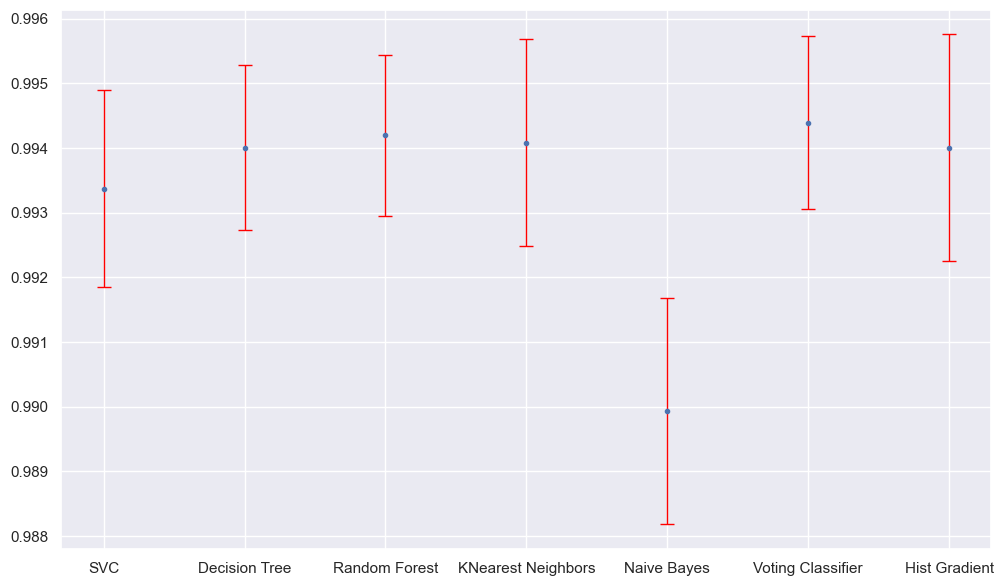

In [ ]:
x = ["SVC", "Decision Tree", "Random Forest", "KNearest Neighbors", "Naive Bayes", "Voting Classifier", "Hist Gradient"]
plt.figure(figsize=(12, 7))
plt.errorbar(x, y, e, elinewidth=1, fmt='.', capsize=5, ecolor='red')
plt.savefig("graphs/model-comparison-CV.jpg")
plt.show()

Plave tačke na grafiku predstavljaju srednju vrednost tačnosti modela, dok crvene linije prestavaljaju standardnu devijaciju tačnosti.

## <a id='toc2_3_'></a>[Evaluacija modela i iscrtavanje grafika](#toc0_)

In [ ]:
trainedVC = votingClassifierSoft_model
trainedHGB = histGradBoost_Model
trainedSVC = bestSVC.fit(data_train_VT,target_train_VT)
trainedDT = bestDecisionTree.fit(data_train_VT,target_train_VT)
trainedRF = bestRandomForest.fit(data_train_VT,target_train_VT)
trainedKNN = bestKnn.fit(data_train_selectP,target_train_selectP)
trainedNB = bestNaivebayes.fit(data_train,target_train)

Radi lakšeg rada, definisana je lista _dict_ podataka koji sadrže sve potrebne podatke za evaluaciju modela.

Nakon toga, definisana je funkcija _makeModelGraphs_ koja prihvata funkciju za iscrtavanje grafika za neki parametar evaluacije, i prethodno definisanu listu modela. Ovo je učinjeno kako bi se iscrtavanje grafika olakšalo.

In [ ]:
models = [
    { 
        "model": trainedSVC,
        "modelName": "SVC",
        "data_test": data_test_VT,
        "target_test": target_test_VT
    },
    { 
        "model": trainedDT,
        "modelName": "DT",
        "data_test": data_test_VT,
        "target_test": target_test_VT
    },
    { 
        "model": trainedRF,
        "modelName": "RF",
        "data_test": data_test_VT,
        "target_test": target_test_VT
    },
    { 
        "model": trainedKNN,
        "modelName": "KNN",
        "data_test": data_test_selectP,
        "target_test": target_test_selectP
    },
    { 
        "model": trainedNB,
        "modelName": "NB",
        "data_test": data_test,
        "target_test": target_test
    },
    { 
        "model": trainedVC,
        "modelName": "VC",
        "data_test": data_test,
        "target_test": target_test
    },
    { 
        "model": trainedHGB,
        "modelName": "HGB",
        "data_test": data_test,
        "target_test": target_test
    }
]

def makeModelGraphs(function, modelDictList: list):
    for model in modelDictList:
        function(model["model"], model["modelName"], model["data_test"], model["target_test"])

### <a id='toc2_3_1_'></a>[Matrica zabune](#toc0_)

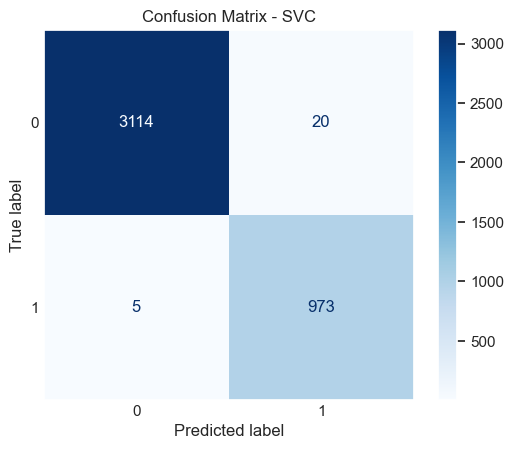

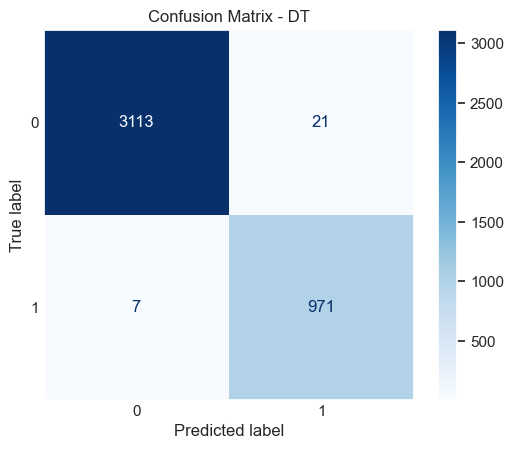

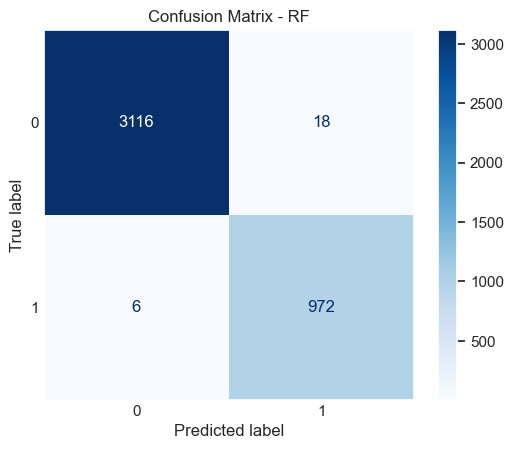

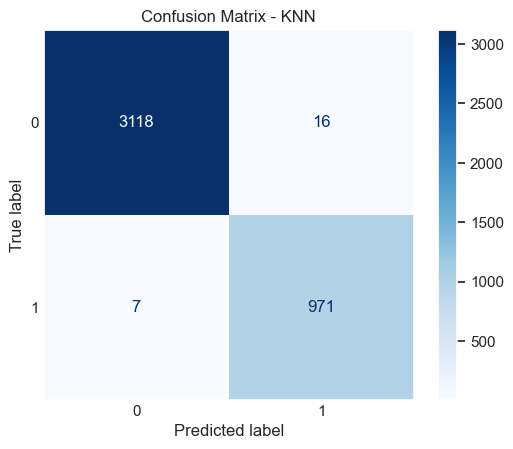

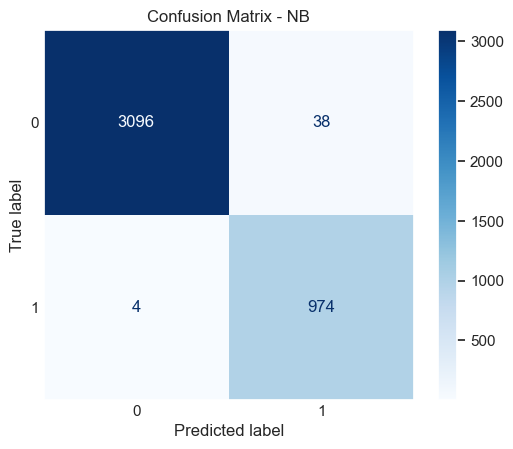

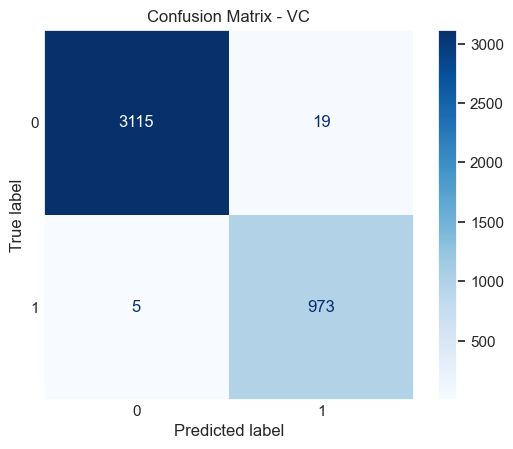

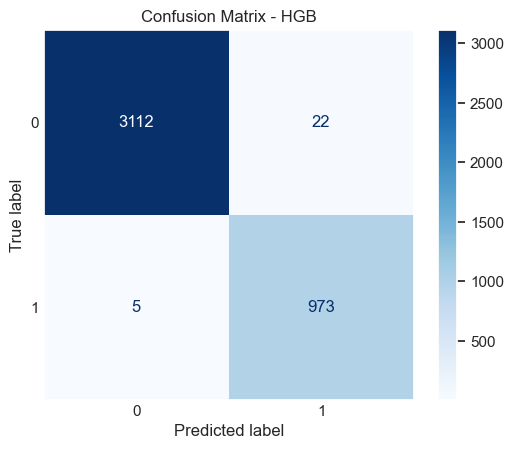

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

def makeClassificationReport(model,modelName,data_test,target_test):
    pred = model.predict(data_test)

    cm = confusion_matrix(target_test, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {modelName}")
    plt.tick_params(axis=u'both', which=u'both',length=0)
    plt.grid(visible=None)
    plt.savefig(f"graphs/confusionMatrix_{modelName}.jpg")
    plt.show()
    

    report = classification_report(target_test,pred, digits=5)
    with io.open(f'evaluation/classification_report_final_{modelName}.txt','w',encoding='utf-8') as f: f.write(report)


makeModelGraphs(makeClassificationReport, models)

### <a id='toc2_3_2_'></a>[_Receiver Operating Characteristic_](#toc0_)

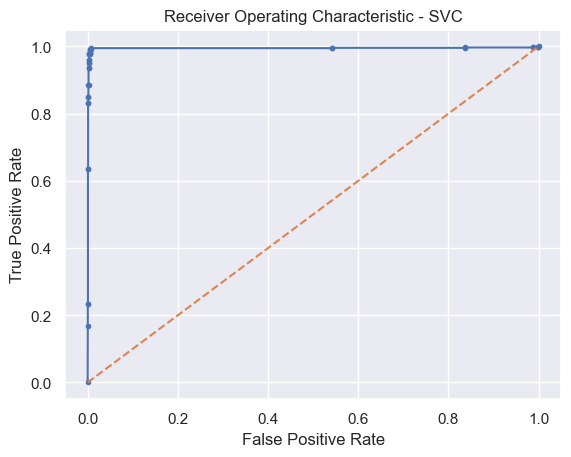

ROC AUC=0.9946697479


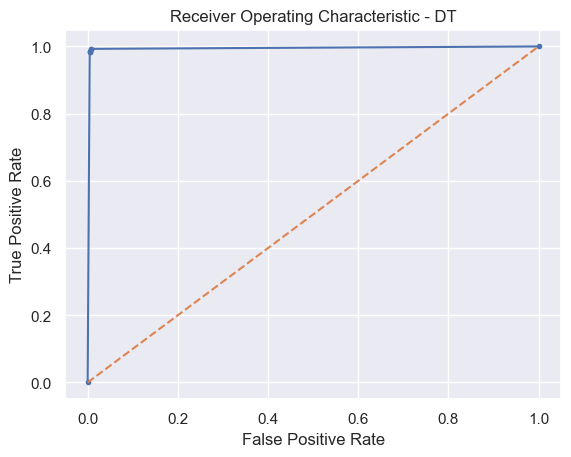

ROC AUC=0.9941490389


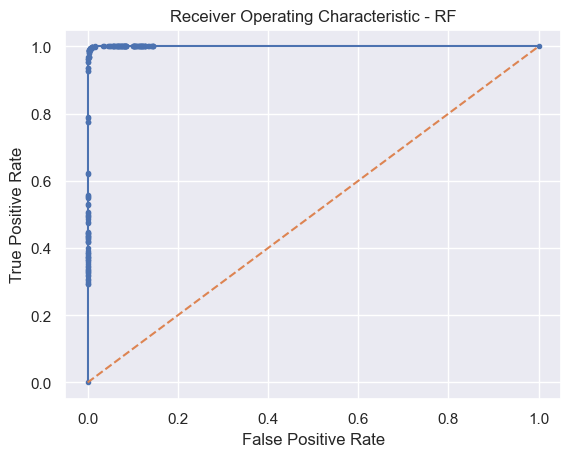

ROC AUC=0.9997735764


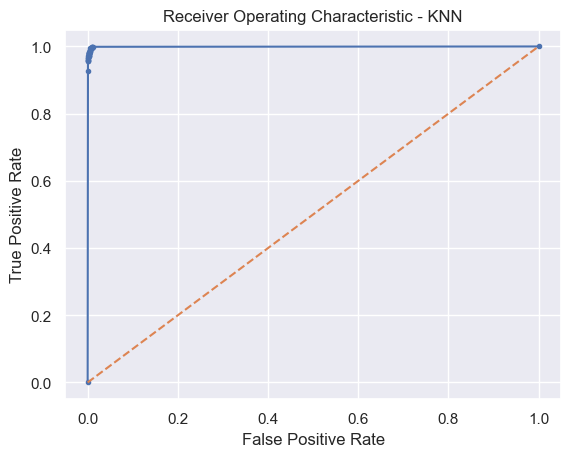

ROC AUC=0.9990187768


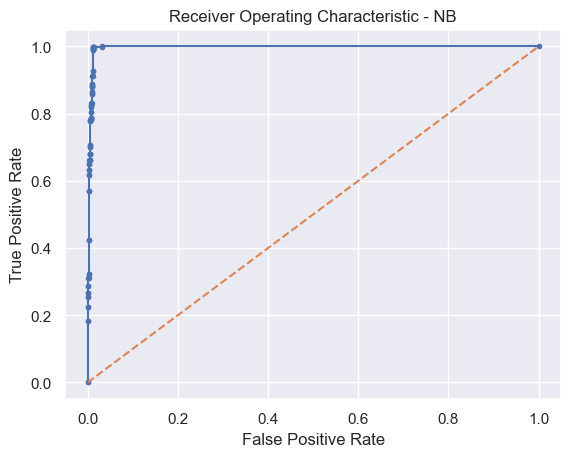

ROC AUC=0.9961762476


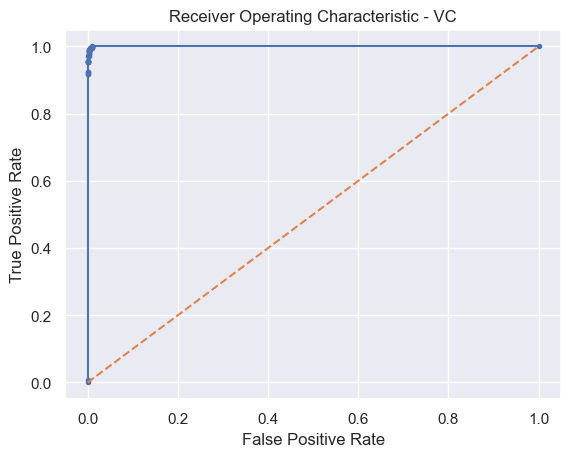

ROC AUC=0.9998358919


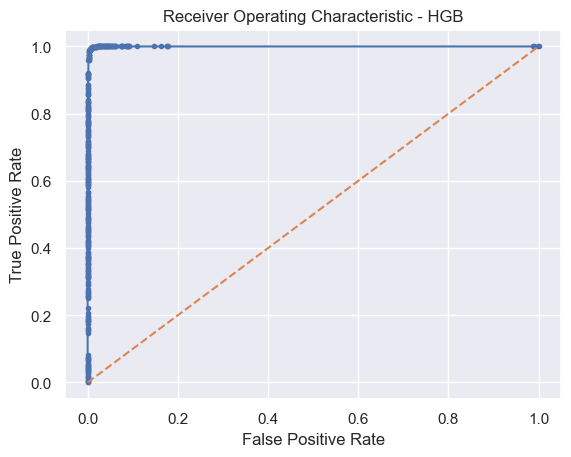

ROC AUC=0.9996372003


In [ ]:
def plotROC(model,model_name,data_test,target_test):

    target_probabilities = model.predict_proba(data_test)[:,1]

    false_positive_rate, true_positive_rate, threshold = roc_curve(target_test,target_probabilities)

    plt.title(f"Receiver Operating Characteristic - {model_name}")
    plt.plot(false_positive_rate, true_positive_rate, marker='.')
    plt.plot([0, 1], ls="--")
    plt.ylabel("True Positive Rate")
    plt.xlabel("False Positive Rate")
    plt.savefig(f"graphs/roc{model_name}.jpg")
    plt.show()

    lr_auc = roc_auc_score(target_test, target_probabilities)
    print('ROC AUC=%.10f' % (lr_auc))

makeModelGraphs(plotROC, models)

### <a id='toc2_3_3_'></a>[_Precision-Recall_ kriva](#toc0_)

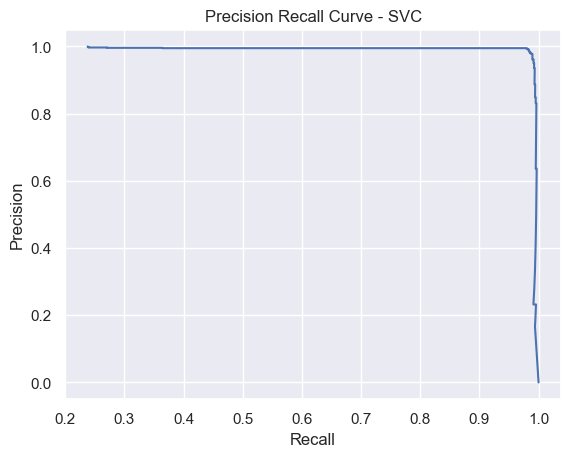

PR AUC=0.9907680742


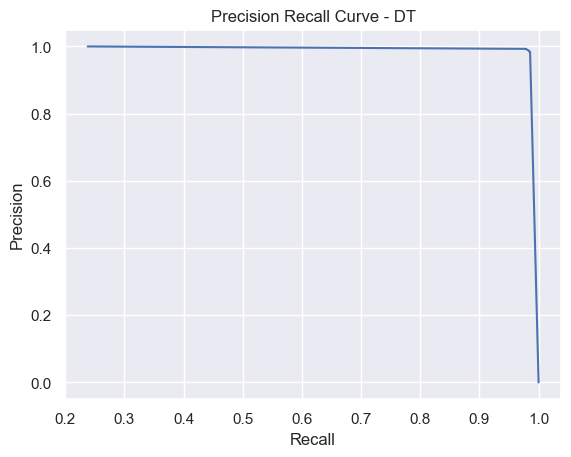

PR AUC=0.9802603247


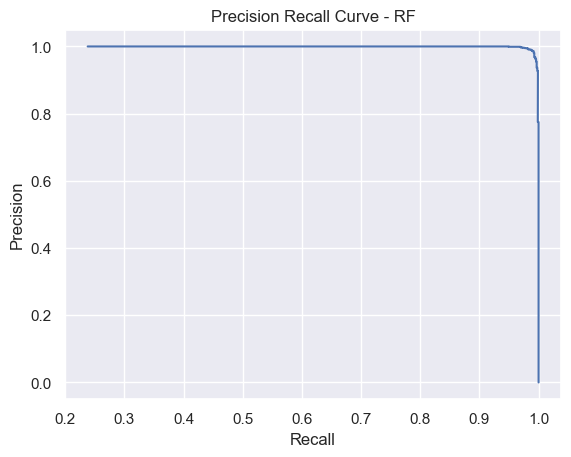

PR AUC=0.9992452819


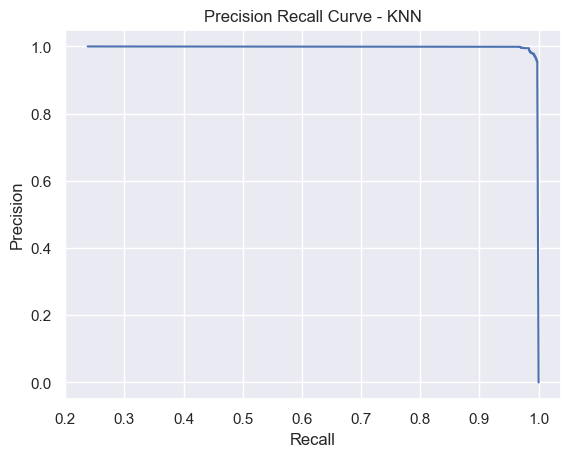

PR AUC=0.9966380755


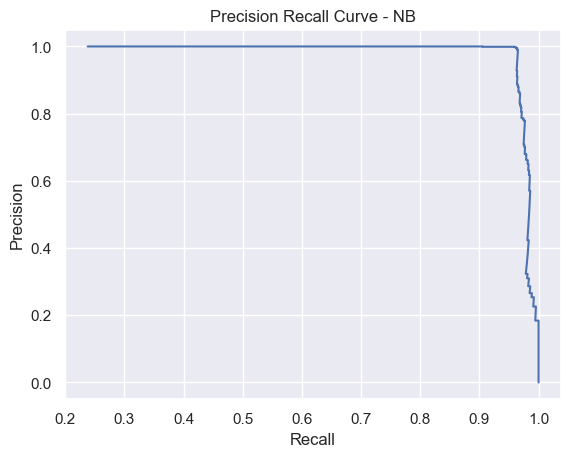

PR AUC=0.9824674119


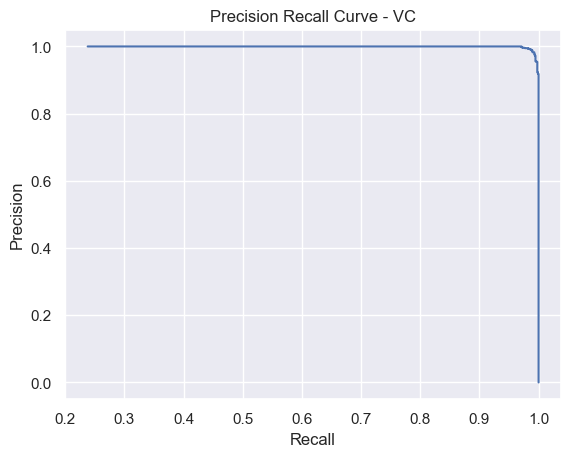

PR AUC=0.9994699035


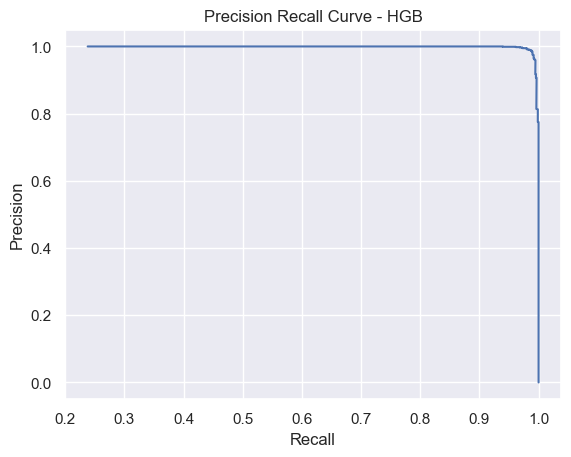

PR AUC=0.9987680401


In [ ]:
from sklearn.metrics import precision_recall_curve,average_precision_score

def plotPrecisionRecallCurve(model,model_name,data_test,target_test):
    target_probabilities = model.predict_proba(data_test)[:,1]

    false_positive_rate, true_positive_rate, threshold = precision_recall_curve(target_test,target_probabilities)

    plt.title(f"Precision Recall Curve - {model_name}")
    plt.plot(false_positive_rate, true_positive_rate)
    plt.ylabel("Precision")
    plt.xlabel("Recall")
    plt.savefig(f"graphs/prCurve{model_name}.jpg")
    plt.show()
    

    lr_auc = average_precision_score(target_test, target_probabilities)
    print('PR AUC=%.10f' % (lr_auc))

makeModelGraphs(plotPrecisionRecallCurve, models)

### <a id='toc2_3_4_'></a>[_Log-loss_ modela](#toc0_)

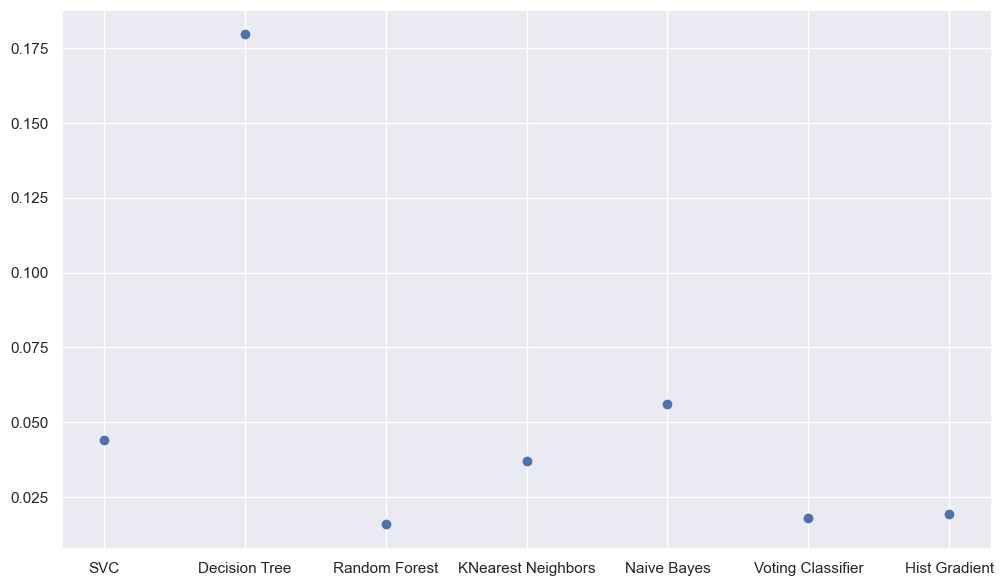

In [ ]:
from sklearn.metrics import log_loss

y = list()

def calculateLogLoss(model, modelName, data_test,target_test):
    target_probabilities = model.predict_proba(data_test)[:,1]
    y.append(log_loss(target_test, target_probabilities))

makeModelGraphs(calculateLogLoss, models)

plt.figure(figsize=(12, 7))
plt.plot(x, y, 'o')
plt.savefig("graphs/model-log-loss-comp-CV.jpg")
plt.show()

``` 
# TODO: Pitati profesora da li treba jos nesto
# TODO: Pitati na osnovu evaluacije, koji je najbolji model
# TODO: Pitati profesora zašto Github ne renderuje ipynb
```   